# 10.13 One Day Project - COVID-19 데이터 분석

```
대한민국 국민들이 코로나에 대응하여 잘하고 있는지 코로나 관련 여러 데이터 분석 후 경향 파악해보기
```

---

# 문제 1
## covid-19 데이터 얻기

- https://kosis.kr/covid/covid_index.do 링크 안에 해외탭 엑셀 시트 활용
- https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_COVID19_004&conn_path=I2
- 통계청에서 코라나19 발생 현황을 기간별, 국가별로 제공해주는 자료가 있지만, 기간이 2020년 5월 이후부터 제공된다. 따라서 이번 프로젝트 진행 자료로는 적합해 보이지 않는다.
- 마찬가지로 우리나라 통계청 데이터를 이용해 구글 covid-19 확진자 현황 데이터를 제공해주는 깃헙 레포지터리가 있다. 일단 초기 확진 데이터부터 시작해 전세계 데이터들을 한곳에서 관리해줘 이쪽 데이터를 이용하기로 결정하였다.
- https://www.google.com/search?q=%EC%BD%94%EB%A1%9C%EB%82%98+%EC%9D%BC%EC%9D%BC+%ED%99%95%EC%A7%84%EC%9E%90&sxsrf=AOaemvKhSrIAlwx-cFxDlBn33brvHHSwbQ%3A1634092335024&ei=L0VmYcB2hPzBA-CUrtAN&ved=0ahUKEwiAyqKprMbzAhUEfnAKHWCKC9oQ4dUDCA4&uact=5&oq=%EC%BD%94%EB%A1%9C%EB%82%98+%EC%9D%BC%EC%9D%BC+%ED%99%95%EC%A7%84%EC%9E%90&gs_lcp=Cgdnd3Mtd2l6EAMyBAgjECcyBAgjECcyBQgAEIAEMgoIABCABBCHAhAUMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEOgsIABCABBCxAxCDAToICAAQgAQQsQM6BwgAEIAEEAo6CQgAEIAEEAoQKjoOCAAQgAQQsQMQgwEQiwM6EAgAEIAEEIcCELEDEBQQiwM6CwgAEIAEELEDEIsDOggIABCABBCLAzoHCAAQAxCLAzoNCAAQgAQQhwIQsQMQFDoHCCMQ6gIQJzoECAAQQzoHCAAQsQMQQzoHCAAQQxCLAzoHCCMQsQIQJzoNCAAQsQMQgwEQChCLA0oECEEYAFCuoJEBWP7FkQFgiceRAWgLcAB4A4ABkgGIAd4ckgEEMS4zMpgBAKABAbABCrgBAsABAQ&sclient=gws-wiz
- https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

- 먼저 해당 레포지터리를 로컬에 클론받은후 
- C:\Users\sanghui\Desktop\toyproject\COVID-19\csse_covid_19_data\csse_covid_19_time_series 경로 안에 타임시리즈별 코로나 확진자 수와 사망자 수 csv 파일을 확인해 볼 수 있다.

In [1]:
import pandas as pd
import numpy as np

## 한국 확진자 데이터 정리하기

In [2]:
korea_raw = pd.read_csv(r"C:\Users\sanghui\Desktop\toyproject\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv")
korea_raw.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  10/2/21  10/3/21  10/4/21  \
0        0        0        0        0  ...   155191   155191   155287   
1        0        0        0        0  ...   171327   171794   171794   
2        0        0        0        0  ...   203657   203789   203915   
3        0        0        0        0  ...    15222    15222    15267   
4        0        0        0        0  ...    58603    58943    58943   

   10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
0   155309   155380   155429   155448   155466    155508    155540  
1   172618   173190   173723   174168   174643    174968    175163  
2   204046   204171   204276   204388   204490    204597    204695  
3    15271    15284    15288    15291    15291     15291     15307  
4    59895    60448    60803    61023    61245     61378     61580  

[5 rows x 633 columns]

In [3]:
# 한국 데이터만 찾아보기
korea_raw = korea_raw[korea_raw["Country/Region"] == "Korea, South"]

- 딱히 필요가 없어보이는 위도, 경도, province/state 컬럼 지우기

In [4]:
del korea_raw["Province/State"]
del korea_raw["Lat"]
del korea_raw["Long"]

In [5]:
korea_raw.head()

Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
160   Korea, South        1        1        2        2        3        4   

     1/28/20  1/29/20  1/30/20  ...  10/2/21  10/3/21  10/4/21  10/5/21  \
160        4        4        4  ...   318105   319777   321352   323379   

     10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
160   325804   327976   329925   331519    332816    334163  

[1 rows x 630 columns]

In [6]:
# 일자별로 한눈에 들어오도록 데이터 정리하기
korea_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 160 to 160
Columns: 630 entries, Country/Region to 10/11/21
dtypes: int64(629), object(1)
memory usage: 4.9+ KB


In [7]:
start_date = pd.to_datetime('2020-01-22')
end_date = pd.to_datetime('2021-10-11')
dates = pd.date_range(start_date, end_date, freq='D')
dates

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-10-02', '2021-10-03', '2021-10-04', '2021-10-05',
               '2021-10-06', '2021-10-07', '2021-10-08', '2021-10-09',
               '2021-10-10', '2021-10-11'],
              dtype='datetime64[ns]', length=629, freq='D')

In [8]:
korea_confirmed = pd.DataFrame({"ds": dates, "y": korea_raw.values[0][1:]})
korea_confirmed

ds       y
0   2020-01-22       1
1   2020-01-23       1
2   2020-01-24       2
3   2020-01-25       2
4   2020-01-26       3
..         ...     ...
624 2021-10-07  327976
625 2021-10-08  329925
626 2021-10-09  331519
627 2021-10-10  332816
628 2021-10-11  334163

[629 rows x 2 columns]

- 위 자료는 누적 데이터이므로 일일 확진자 수로 다시 재계산 해본다

In [9]:
korea_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      629 non-null    datetime64[ns]
 1   y       629 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 10.0+ KB


In [10]:
# 확진자 수가 데이터 타입 정수형으로 변환
korea_confirmed["y"] = korea_confirmed["y"].astype("int64")

In [11]:
korea_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      629 non-null    datetime64[ns]
 1   y       629 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.0 KB


In [12]:
# 데이터 타입이 변경되었고 결측치 데이터도 없어보인다.

# 각 행간 데이터의 차를 구하기 위해 임시 테이블 하나 생성
tmp = korea_confirmed.copy()

for i in range(1,629):
    # 각 행의 차를 구한후 원본 프레임에 데이터 재할당
    korea_confirmed["y"][i] = tmp["y"][i] - tmp["y"][i-1]

C:\Users\sanghui\AppData\Local\Temp/ipykernel_8796/1369794192.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korea_confirmed["y"][i] = tmp["y"][i] - tmp["y"][i-1]


In [13]:
korea_confirmed.head()

ds  y
0 2020-01-22  1
1 2020-01-23  0
2 2020-01-24  1
3 2020-01-25  0
4 2020-01-26  1

In [14]:
korea_confirmed.tail()

ds     y
624 2021-10-07  2172
625 2021-10-08  1949
626 2021-10-09  1594
627 2021-10-10  1297
628 2021-10-11  1347

## 한국 사망자 데이터 구하기

In [15]:
korea_death_raw = pd.read_csv(r"C:\Users\sanghui\Desktop\toyproject\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_deaths_global.csv")
korea_death_raw.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  10/2/21  10/3/21  10/4/21  \
0        0        0        0        0  ...     7206     7206     7212   
1        0        0        0        0  ...     2710     2713     2713   
2        0        0        0        0  ...     5819     5822     5826   
3        0        0        0        0  ...      130      130      130   
4        0        0        0        0  ...     1574     1577     1577   

   10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
0     7214     7220     7221     7221     7221      7225      7228  
1     2725     2734     2746     2753     2759      2768      2777  
2     5831     5838     5843     5846     5850      5853      5855  
3      130      130      130      130      130       130       130  
4     1587     1598     1603     1613     1618      1622      1629  

[5 rows x 633 columns]

In [16]:
korea_death_raw = korea_death_raw[korea_death_raw["Country/Region"] == "Korea, South"]

del korea_death_raw["Province/State"]
del korea_death_raw["Lat"]
del korea_death_raw["Long"]

In [17]:
korea_death_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 160 to 160
Columns: 630 entries, Country/Region to 10/11/21
dtypes: int64(629), object(1)
memory usage: 4.9+ KB


In [18]:
korea_death = pd.DataFrame({"ds": dates, "y": korea_death_raw.values[0][1:]})

In [19]:
korea_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      629 non-null    datetime64[ns]
 1   y       629 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 10.0+ KB


In [20]:
korea_death["y"] = korea_death["y"].astype("int64")

tmp = korea_death.copy()

for i in range(1,629):
    # 각 행의 차를 구한후 원본 프레임에 데이터 재할당
    korea_death["y"][i] = tmp["y"][i] - tmp["y"][i-1]

C:\Users\sanghui\AppData\Local\Temp/ipykernel_8796/213754424.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korea_death["y"][i] = tmp["y"][i] - tmp["y"][i-1]


In [21]:
korea_death.head()

ds  y
0 2020-01-22  0
1 2020-01-23  0
2 2020-01-24  0
3 2020-01-25  0
4 2020-01-26  0

In [22]:
korea_death.tail()

ds   y
624 2021-10-07  10
625 2021-10-08   6
626 2021-10-09  15
627 2021-10-10   8
628 2021-10-11  11

## 한국 확진후 회복자 데이터

In [23]:
korea_recover_raw = pd.read_csv(r"C:\Users\sanghui\Desktop\toyproject\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_recovered_global.csv")
korea_recover_raw.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  10/2/21  10/3/21  10/4/21  \
0        0        0        0        0  ...        0        0        0   
1        0        0        0        0  ...        0        0        0   
2        0        0        0        0  ...        0        0        0   
3        0        0        0        0  ...        0        0        0   
4        0        0        0        0  ...        0        0        0   

   10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
0        0        0        0        0        0         0         0  
1        0        0        0        0        0         0         0  
2        0        0        0        0        0         0         0  
3        0        0        0        0        0         0         0  
4        0        0        0        0        0         0         0  

[5 rows x 633 columns]

In [24]:
korea_recover_raw = korea_recover_raw[korea_recover_raw["Country/Region"] == "Korea, South"]

del korea_recover_raw["Province/State"]
del korea_recover_raw["Lat"]
del korea_recover_raw["Long"]

In [25]:
korea_recover_raw

Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
145   Korea, South        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  10/2/21  10/3/21  10/4/21  10/5/21  \
145        0        0        0  ...        0        0        0        0   

     10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
145        0        0        0        0         0         0  

[1 rows x 630 columns]

In [26]:
korea_recover = pd.DataFrame({"ds": dates, "y": korea_recover_raw.values[0][1:]})

In [27]:
korea_recover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      629 non-null    datetime64[ns]
 1   y       629 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 10.0+ KB


In [28]:
korea_recover["y"] = korea_recover["y"].astype("int64")

tmp = korea_recover.copy()

for i in range(1,629):
    # 각 행의 차를 구한후 원본 프레임에 데이터 재할당
    korea_recover["y"][i] = tmp["y"][i] - tmp["y"][i-1]

C:\Users\sanghui\AppData\Local\Temp/ipykernel_8796/273525782.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korea_recover["y"][i] = tmp["y"][i] - tmp["y"][i-1]


In [29]:
korea_recover[korea_recover["y"] != 0]

ds       y
16  2020-02-07       1
18  2020-02-09       2
21  2020-02-12       4
24  2020-02-15       2
26  2020-02-17       1
..         ...     ...
557 2021-08-01     931
558 2021-08-02    1304
559 2021-08-03    1214
560 2021-08-04    1596
561 2021-08-05 -180719

[521 rows x 2 columns]

- 회복자 수는 중간에 0인 경우가 많아서 음수인 케이스가 나왓다 따라서 음수인 케이스 전부 값을 0으로 재할당 해준다

In [30]:
korea_recover.loc[korea_recover["y"] < 0] = 0 

In [31]:
korea_recover[korea_recover["y"] < 0]

Empty DataFrame
Columns: [ds, y]
Index: []

---

# 문제 2. 비교 국가 4개 선정하기

- 비교 국가는 G20에 속해 있는 국가 중 GDP가 높은 국가중에서 찾는다.
- 위 기준에 속해 있는 국가중 구글에 '코로나 일일 확진자'라고 검색하면 나오는 국가중 비교할만한 대상 국가를 찾는다.
- 구글 데이터에서 확진자 수와 사망자 수가 높은 미국, 독일, 영국, 프랑스 4개의 국가를 비교 군으로 삼는다.

## 미국 확진자 데이터 정리하기

- 미국 같은 경우는 원본 데이터가 global로 관리되지 않고 US로 따로 관리되고 각 주에 해당하는 도시별 데이터가 따로 있는 상황이라 별도의 처리 과정이 필요하다.

In [32]:
us_confirmed_raw = pd.read_csv(r"C:\Users\sanghui\Desktop\toyproject\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_US.csv")
us_confirmed_raw.head()

UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 10/2/21  10/3/21  10/4/21  10/5/21  10/6/21  \
0  32.539527 -86.644082  ...    9777     9780     9790     9799     9810   
1  30.727750 -87.722071  ...   36542    36579    36602    36697    36734   
2  31.868263 -85.387129  ...    3512     3519     3521     3524     3527   
3  32.996421 -87.125115  ...    4153     4157     4163     4167     4168   
4  33.982109 -86.567906  ...    9860     9870     9878     9923     9941   

   10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
0     9826     9839     9843      9850      9851  
1    36780    36814    36870     36889     36905  
2     3536     3541     3545      3546      3546  
3     4176     4184     4192      4193      4194  
4     9957     9970     9998     10013     10020  

[5 rows x 640 columns]

In [33]:
dates

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-10-02', '2021-10-03', '2021-10-04', '2021-10-05',
               '2021-10-06', '2021-10-07', '2021-10-08', '2021-10-09',
               '2021-10-10', '2021-10-11'],
              dtype='datetime64[ns]', length=629, freq='D')

In [34]:
us_confirmed_raw.columns[11:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '10/2/21', '10/3/21', '10/4/21', '10/5/21', '10/6/21', '10/7/21',
       '10/8/21', '10/9/21', '10/10/21', '10/11/21'],
      dtype='object', length=629)

In [35]:
# 일자별 합계 데이터를 구한다.
us_confirmed_raw = us_confirmed_raw.groupby(["Country_Region"]).sum()

In [36]:
us_confirmed_raw

UID    code3         FIPS            Lat  \
Country_Region                                                      
US              278822801147  2788882  110099539.0  122723.644829   

                        Long_  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Country_Region                                                               
US             -296241.715201        1        1        2        2        5   

                ...   10/2/21   10/3/21   10/4/21   10/5/21   10/6/21  \
Country_Region  ...                                                     
US              ...  43657833  43683048  43852255  43947489  44058827   

                 10/7/21   10/8/21   10/9/21  10/10/21  10/11/21  
Country_Region                                                    
US              44158910  44290052  44317553  44339747  44455957  

[1 rows x 634 columns]

In [37]:
us_confirmed_raw.reset_index(inplace=True)
us_confirmed_raw

Country_Region           UID    code3         FIPS            Lat  \
0             US  278822801147  2788882  110099539.0  122723.644829   

           Long_  1/22/20  1/23/20  1/24/20  1/25/20  ...   10/2/21   10/3/21  \
0 -296241.715201        1        1        2        2  ...  43657833  43683048   

    10/4/21   10/5/21   10/6/21   10/7/21   10/8/21   10/9/21  10/10/21  \
0  43852255  43947489  44058827  44158910  44290052  44317553  44339747   

   10/11/21  
0  44455957  

[1 rows x 635 columns]

In [38]:
us_confirmed_raw.columns[6:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '10/2/21', '10/3/21', '10/4/21', '10/5/21', '10/6/21', '10/7/21',
       '10/8/21', '10/9/21', '10/10/21', '10/11/21'],
      dtype='object', length=629)

In [39]:
# 필요 없는 칼럼 삭제
del us_confirmed_raw["Country_Region"]
del us_confirmed_raw["UID"]
del us_confirmed_raw["code3"]
del us_confirmed_raw["FIPS"]
del us_confirmed_raw["Lat"]
del us_confirmed_raw["Long_"]

In [40]:
us_confirmed_raw

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0        1        1        2        2        5        5        5        6   

   1/30/20  1/31/20  ...   10/2/21   10/3/21   10/4/21   10/5/21   10/6/21  \
0        6        8  ...  43657833  43683048  43852255  43947489  44058827   

    10/7/21   10/8/21   10/9/21  10/10/21  10/11/21  
0  44158910  44290052  44317553  44339747  44455957  

[1 rows x 629 columns]

In [41]:
us_confirmed_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 629 entries, 1/22/20 to 10/11/21
dtypes: int64(629)
memory usage: 5.0 KB


In [42]:
us_confirmed_raw.values[0]

array([       1,        1,        2,        2,        5,        5,
              5,        6,        6,        8,        8,        8,
             11,       11,       11,       12,       12,       12,
             12,       12,       13,       13,       14,       14,
             14,       14,       15,       16,       16,       16,
             16,       16,       16,       17,       18,       19,
             19,       19,       26,       39,       57,       79,
            113,      184,      247,      417,      538,      630,
            797,     1156,     1596,     2222,     2952,     3234,
           4667,     6450,     9156,    13663,    20064,    26056,
          34944,    46096,    56714,    68841,    86662,   105253,
         127417,   143544,   165698,   192079,   224281,   256626,
         288993,   321379,   350713,   382646,   413222,   444341,
         480413,   514690,   543878,   570812,   597803,   626217,
         652179,   682442,   715446,   743379,   769251,   799

In [43]:
us_confirmed = pd.DataFrame({"ds": dates, "y": us_confirmed_raw.values[0]})
us_confirmed.head()

ds  y
0 2020-01-22  1
1 2020-01-23  1
2 2020-01-24  2
3 2020-01-25  2
4 2020-01-26  5

In [44]:
# 누적 데이터 이므로 마찬가지로 일일 데이터로 변환 시켜준다.
tmp = us_confirmed.copy()

for i in range(1,629):
    # 각 행의 차를 구한후 원본 프레임에 데이터 재할당
    us_confirmed["y"][i] = tmp["y"][i] - tmp["y"][i-1]

C:\Users\sanghui\AppData\Local\Temp/ipykernel_8796/766653357.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_confirmed["y"][i] = tmp["y"][i] - tmp["y"][i-1]


In [45]:
us_confirmed.head()

ds  y
0 2020-01-22  1
1 2020-01-23  0
2 2020-01-24  1
3 2020-01-25  0
4 2020-01-26  3

In [46]:
us_confirmed.tail()

ds       y
624 2021-10-07  100083
625 2021-10-08  131142
626 2021-10-09   27501
627 2021-10-10   22194
628 2021-10-11  116210

## 미국 사망자 데이터 정리하기

In [47]:
us_death_raw = pd.read_csv(r"C:\Users\sanghui\Desktop\toyproject\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_deaths_US.csv")
us_death_raw.head()

UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 10/2/21  10/3/21  10/4/21  10/5/21  10/6/21  \
0  32.539527 -86.644082  ...     142      142      142      142      143   
1  30.727750 -87.722071  ...     518      518      518      520      525   
2  31.868263 -85.387129  ...      71       71       71       71       72   
3  32.996421 -87.125115  ...      83       83       83       83       83   
4  33.982109 -86.567906  ...     162      162      162      164      166   

   10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
0      144      144      144       144       144  
1      528      530      532       532       532  
2       72       73       74        74        74  
3       85       86       86        86        86  
4      167      168      172       172       172  

[5 rows x 641 columns]

In [48]:
# 일자별 합계 데이터를 구한다.
us_death_raw = us_death_raw.groupby(["Country_Region"]).sum()

In [49]:
us_death_raw.head()

UID    code3         FIPS            Lat  \
Country_Region                                                      
US              278822801147  2788882  110099539.0  122723.644829   

                        Long_  Population  1/22/20  1/23/20  1/24/20  1/25/20  \
Country_Region                                                                  
US             -296241.715201   332875137        1        1        1        1   

                ...  10/2/21  10/3/21  10/4/21  10/5/21  10/6/21  10/7/21  \
Country_Region  ...                                                         
US              ...   701451   701704   703819   705553   708110   710502   

                10/8/21  10/9/21  10/10/21  10/11/21  
Country_Region                                        
US               712339   712618    712873    714056  

[1 rows x 635 columns]

In [50]:
us_death_raw.reset_index(inplace=True)

In [51]:
del us_death_raw["Country_Region"]
del us_death_raw["UID"]
del us_death_raw["code3"]
del us_death_raw["FIPS"]
del us_death_raw["Lat"]
del us_death_raw["Long_"]

In [52]:
us_death_raw

Population  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
0   332875137        1        1        1        1        1        1        1   

   1/29/20  1/30/20  ...  10/2/21  10/3/21  10/4/21  10/5/21  10/6/21  \
0        1        1  ...   701451   701704   703819   705553   708110   

   10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
0   710502   712339   712618    712873    714056  

[1 rows x 630 columns]

In [53]:
us_death = pd.DataFrame({"ds": dates, "y": us_death_raw.values[0][1:]})
us_death.head()

ds  y
0 2020-01-22  1
1 2020-01-23  1
2 2020-01-24  1
3 2020-01-25  1
4 2020-01-26  1

In [54]:
# 누적 데이터 > 일일 데이터로 변환
tmp = us_death.copy()

for i in range(1,629):
    # 각 행의 차를 구한후 원본 프레임에 데이터 재할당
    us_death["y"][i] = tmp["y"][i] - tmp["y"][i-1]

C:\Users\sanghui\AppData\Local\Temp/ipykernel_8796/177321823.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_death["y"][i] = tmp["y"][i] - tmp["y"][i-1]


In [55]:
us_death.head()

ds  y
0 2020-01-22  1
1 2020-01-23  0
2 2020-01-24  0
3 2020-01-25  0
4 2020-01-26  0

In [56]:
us_death.tail()

ds     y
624 2021-10-07  2392
625 2021-10-08  1837
626 2021-10-09   279
627 2021-10-10   255
628 2021-10-11  1183

---

## 독일 확진자 데이터 가져오기

In [57]:
german_cofirmed_raw = pd.read_csv(r"C:\Users\sanghui\Desktop\toyproject\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv")
german_cofirmed_raw.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  10/2/21  10/3/21  10/4/21  \
0        0        0        0        0  ...   155191   155191   155287   
1        0        0        0        0  ...   171327   171794   171794   
2        0        0        0        0  ...   203657   203789   203915   
3        0        0        0        0  ...    15222    15222    15267   
4        0        0        0        0  ...    58603    58943    58943   

   10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
0   155309   155380   155429   155448   155466    155508    155540  
1   172618   173190   173723   174168   174643    174968    175163  
2   204046   204171   204276   204388   204490    204597    204695  
3    15271    15284    15288    15291    15291     15291     15307  
4    59895    60448    60803    61023    61245     61378     61580  

[5 rows x 633 columns]

In [58]:
german_cofirmed_raw = german_cofirmed_raw[german_cofirmed_raw["Country/Region"] == "Germany"]

In [59]:
german_cofirmed_raw.head()

Province/State Country/Region        Lat       Long  1/22/20  1/23/20  \
134            NaN        Germany  51.165691  10.451526        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  10/2/21  10/3/21  10/4/21  \
134        0        0        0        1  ...  4255543  4260494  4265001   

     10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
134  4272764  4284400  4295876  4305634  4312528   4318437   4323346  

[1 rows x 633 columns]

In [60]:
del german_cofirmed_raw["Province/State"]
del german_cofirmed_raw["Lat"]
del german_cofirmed_raw["Long"]

In [61]:
dates

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-10-02', '2021-10-03', '2021-10-04', '2021-10-05',
               '2021-10-06', '2021-10-07', '2021-10-08', '2021-10-09',
               '2021-10-10', '2021-10-11'],
              dtype='datetime64[ns]', length=629, freq='D')

In [62]:
german_cofirmed_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 134 to 134
Columns: 630 entries, Country/Region to 10/11/21
dtypes: int64(629), object(1)
memory usage: 4.9+ KB


In [63]:
german_confirmed = pd.DataFrame({"ds": dates, "y": german_cofirmed_raw.values[0][1:]})
german_confirmed

ds        y
0   2020-01-22        0
1   2020-01-23        0
2   2020-01-24        0
3   2020-01-25        0
4   2020-01-26        0
..         ...      ...
624 2021-10-07  4295876
625 2021-10-08  4305634
626 2021-10-09  4312528
627 2021-10-10  4318437
628 2021-10-11  4323346

[629 rows x 2 columns]

In [64]:
# 누적 데이터 > 일일 데이터로 변환
tmp = german_confirmed.copy()

for i in range(1,629):
    # 각 행의 차를 구한후 원본 프레임에 데이터 재할당
    german_confirmed["y"][i] = tmp["y"][i] - tmp["y"][i-1]

C:\Users\sanghui\AppData\Local\Temp/ipykernel_8796/2242741394.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  german_confirmed["y"][i] = tmp["y"][i] - tmp["y"][i-1]


In [65]:
german_confirmed.head()

ds  y
0 2020-01-22  0
1 2020-01-23  0
2 2020-01-24  0
3 2020-01-25  0
4 2020-01-26  0

In [66]:
german_confirmed.tail()

ds      y
624 2021-10-07  11476
625 2021-10-08   9758
626 2021-10-09   6894
627 2021-10-10   5909
628 2021-10-11   4909

## 독일 사망자 데이터 정리

In [67]:
german_death_raw = pd.read_csv(r"C:\Users\sanghui\Desktop\toyproject\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_deaths_global.csv")
german_death_raw = german_death_raw[german_death_raw["Country/Region"] == "Germany"]
german_death_raw.head()

Province/State Country/Region        Lat       Long  1/22/20  1/23/20  \
134            NaN        Germany  51.165691  10.451526        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  10/2/21  10/3/21  10/4/21  \
134        0        0        0        0  ...    93791    93798    93887   

     10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
134    93963    94031    94117    94182    94206     94213     94308  

[1 rows x 633 columns]

In [68]:
del german_death_raw["Province/State"]
del german_death_raw["Lat"]
del german_death_raw["Long"]

In [69]:
german_death_raw

Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
134        Germany        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  10/2/21  10/3/21  10/4/21  10/5/21  \
134        0        0        0  ...    93791    93798    93887    93963   

     10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
134    94031    94117    94182    94206     94213     94308  

[1 rows x 630 columns]

In [70]:
german_death_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 134 to 134
Columns: 630 entries, Country/Region to 10/11/21
dtypes: int64(629), object(1)
memory usage: 4.9+ KB


In [71]:
german_death = pd.DataFrame({"ds": dates, "y": german_death_raw.values[0][1:]})
german_death.tail()

ds      y
624 2021-10-07  94117
625 2021-10-08  94182
626 2021-10-09  94206
627 2021-10-10  94213
628 2021-10-11  94308

In [72]:
# 누적 데이터 > 일일 데이터로 변환
tmp = german_death.copy()

for i in range(1,629):
    # 각 행의 차를 구한후 원본 프레임에 데이터 재할당
    german_death["y"][i] = tmp["y"][i] - tmp["y"][i-1]

C:\Users\sanghui\AppData\Local\Temp/ipykernel_8796/1016646461.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  german_death["y"][i] = tmp["y"][i] - tmp["y"][i-1]


In [73]:
german_death.tail()

ds   y
624 2021-10-07  86
625 2021-10-08  65
626 2021-10-09  24
627 2021-10-10   7
628 2021-10-11  95

## 영국 확진자 수 가져오기

In [74]:
uk_confirmed_raw = pd.read_csv(r"C:\Users\sanghui\Desktop\toyproject\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv")
uk_confirmed_raw = uk_confirmed_raw[uk_confirmed_raw["Country/Region"] == "United Kingdom"]
uk_confirmed_raw

Province/State  Country/Region        Lat  \
258                                      Anguilla  United Kingdom  18.220600   
259                                       Bermuda  United Kingdom  32.307800   
260                        British Virgin Islands  United Kingdom  18.420700   
261                                Cayman Islands  United Kingdom  19.313300   
262                               Channel Islands  United Kingdom  49.372300   
263                   Falkland Islands (Malvinas)  United Kingdom -51.796300   
264                                     Gibraltar  United Kingdom  36.140800   
265                                   Isle of Man  United Kingdom  54.236100   
266                                    Montserrat  United Kingdom  16.742498   
267  Saint Helena, Ascension and Tristan da Cunha  United Kingdom  -7.946700   
268                      Turks and Caicos Islands  United Kingdom  21.694000   
269                                           NaN  United Kingdom  55.378100   

          Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
258 -63.068600        0        0        0        0        0        0  ...   
259 -64.750500        0        0        0        0        0        0  ...   
260 -64.640000        0        0        0        0        0        0  ...   
261 -81.254600        0        0        0        0        0        0  ...   
262  -2.364400        0        0        0        0        0        0  ...   
263 -59.523600        0        0        0        0        0        0  ...   
264  -5.353600        0        0        0        0        0        0  ...   
265  -4.548100        0        0        0        0        0        0  ...   
266 -62.187366        0        0        0        0        0        0  ...   
267 -14.355900        0        0        0        0        0        0  ...   
268 -71.797900        0        0        0        0        0        0  ...   
269  -3.436000        0        0        0        0        0        0  ...   

     10/2/21  10/3/21  10/4/21  10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  \
258      425      425      453      453      453      499      544      544   
259     5336     5336     5419     5419     5455     5455     5501     5501   
260     2642     2642     2642     2642     2725     2725     2725     2725   
261      853      853      905      920      920      939      960      960   
262    11657    11657    11707    11737    11775    11812    11843    11843   
263       67       67       67       67       68       68       68       68   
264     5566     5573     5579     5590     5597     5606     5608     5613   
265     7634     7671     7698     7770     7843     7899     7959     8028   
266       34       34       34       40       40       40       40       41   
267        4        4        4        4        4        4        4        4   
268     2859     2868     2868     2875     2884     2885     2890     2895   
269  7871014  7900680  7934936  7967985  8006660  8046390  8081300  8120713   

     10/10/21  10/11/21  
258       544       594  
259      5501      5501  
260      2725      2725  
261       960       983  
262     11843     11968  
263        68        68  
264      5626      5655  
265      8073      8121  
266        41        41  
267         4         4  
268      2898      2898  
269   8154306   8193769  

[12 rows x 633 columns]

In [75]:
# 미국과 마찬가지로 그룹화를 진행시켜 준다.
uk_confirmed_raw = uk_confirmed_raw.groupby(["Country/Region"]).sum()
uk_confirmed_raw

Lat        Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                               
United Kingdom  262.083198 -497.280566        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  10/2/21  10/3/21  \
Country/Region                                      ...                     
United Kingdom        0        0        0        0  ...  7908091  7937810   

                10/4/21  10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  \
Country/Region                                                         
United Kingdom  7972312  8005502  8044424  8084322  8119442  8158935   

                10/10/21  10/11/21  
Country/Region                      
United Kingdom   8192589   8232327  

[1 rows x 631 columns]

In [76]:
uk_confirmed_raw.reset_index(inplace=True)
uk_confirmed_raw

Country/Region         Lat        Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0  United Kingdom  262.083198 -497.280566        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  10/2/21  10/3/21  10/4/21  10/5/21  \
0        0        0        0  ...  7908091  7937810  7972312  8005502   

   10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
0  8044424  8084322  8119442  8158935   8192589   8232327  

[1 rows x 632 columns]

In [77]:
# 필요없는 칼럼 삭제
del uk_confirmed_raw["Country/Region"]
del uk_confirmed_raw["Lat"]
del uk_confirmed_raw["Long"]

In [78]:
uk_confirmed_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 629 entries, 1/22/20 to 10/11/21
dtypes: int64(629)
memory usage: 5.0 KB


In [79]:
uk_confirmed_raw.values[0]

array([      0,       0,       0,       0,       0,       0,       0,
             0,       0,       2,       2,       2,       8,       8,
             9,       9,       9,      13,      14,      14,      15,
            16,      17,      18,      18,      18,      19,      19,
            20,      22,      23,      23,      28,      30,      34,
            37,      44,      56,      61,      94,     134,     189,
           246,     295,     374,     429,     483,     630,     889,
          1301,    1790,    2270,    2634,    3077,    3692,    4462,
          5468,    6534,    7792,    9007,   10395,   12744,   15126,
         17843,   20970,   24219,   27062,   29954,   34281,   38815,
         43789,   48718,   53699,   57772,   61422,   66738,   72224,
         77387,   82293,   86660,   90273,   93812,   98017,  102365,
        107465,  112808,  117798,  122534,  126394,  131260,  136035,
        141540,  146708,  151689,  155453,  158926,  163630,  168357,
        173807,  178

In [80]:
dates

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-10-02', '2021-10-03', '2021-10-04', '2021-10-05',
               '2021-10-06', '2021-10-07', '2021-10-08', '2021-10-09',
               '2021-10-10', '2021-10-11'],
              dtype='datetime64[ns]', length=629, freq='D')

In [81]:
uk_confirmed = pd.DataFrame({"ds": dates, "y": uk_confirmed_raw.values[0]})
uk_confirmed.head()

ds  y
0 2020-01-22  0
1 2020-01-23  0
2 2020-01-24  0
3 2020-01-25  0
4 2020-01-26  0

In [82]:
uk_confirmed.tail()

ds        y
624 2021-10-07  8084322
625 2021-10-08  8119442
626 2021-10-09  8158935
627 2021-10-10  8192589
628 2021-10-11  8232327

In [83]:
# 누적 데이터 이므로 마찬가지로 일일 데이터로 변환 시켜준다.
tmp = uk_confirmed.copy()

for i in range(1,629):
    # 각 행의 차를 구한후 원본 프레임에 데이터 재할당
    uk_confirmed["y"][i] = tmp["y"][i] - tmp["y"][i-1]

C:\Users\sanghui\AppData\Local\Temp/ipykernel_8796/1858057424.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_confirmed["y"][i] = tmp["y"][i] - tmp["y"][i-1]


In [84]:
uk_confirmed.tail()

ds      y
624 2021-10-07  39898
625 2021-10-08  35120
626 2021-10-09  39493
627 2021-10-10  33654
628 2021-10-11  39738

In [85]:
# 음수 데이터 0 처리 해주기
uk_confirmed.loc[uk_confirmed["y"] < 0] = 0

In [86]:
uk_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      629 non-null    object
 1   y       629 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [87]:
uk_confirmed["ds"] = dates

In [88]:
uk_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      629 non-null    datetime64[ns]
 1   y       629 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.0 KB


In [89]:
uk_confirmed.tail()

ds      y
624 2021-10-07  39898
625 2021-10-08  35120
626 2021-10-09  39493
627 2021-10-10  33654
628 2021-10-11  39738

## 영국 사망자 데이터 가져오기

In [90]:
uk_death_raw = pd.read_csv(r"C:\Users\sanghui\Desktop\toyproject\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_deaths_global.csv")
uk_death_raw = uk_death_raw[uk_death_raw["Country/Region"] == "United Kingdom"]
uk_death_raw.head()

Province/State  Country/Region      Lat     Long  1/22/20  \
258                Anguilla  United Kingdom  18.2206 -63.0686        0   
259                 Bermuda  United Kingdom  32.3078 -64.7505        0   
260  British Virgin Islands  United Kingdom  18.4207 -64.6400        0   
261          Cayman Islands  United Kingdom  19.3133 -81.2546        0   
262         Channel Islands  United Kingdom  49.3723  -2.3644        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/2/21  10/3/21  \
258        0        0        0        0        0  ...        1        1   
259        0        0        0        0        0  ...       75       75   
260        0        0        0        0        0  ...       37       37   
261        0        0        0        0        0  ...        2        2   
262        0        0        0        0        0  ...       97       97   

     10/4/21  10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
258        1        1        1        1        1        1         1         1  
259       82       82       87       87       89       89        89        89  
260       37       37       37       37       37       37        37        37  
261        2        2        2        2        2        2         2         2  
262       97       97       99       99      100      100       100       100  

[5 rows x 633 columns]

In [91]:
uk_death_raw = uk_death_raw.groupby(["Country/Region"]).sum()
uk_death_raw

Lat        Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                               
United Kingdom  262.083198 -497.280566        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  10/2/21  10/3/21  \
Country/Region                                      ...                     
United Kingdom        0        0        0        0  ...   137295   137338   

                10/4/21  10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  \
Country/Region                                                         
United Kingdom   137378   137544   137694   137818   137945   138101   

                10/10/21  10/11/21  
Country/Region                      
United Kingdom    138139    138167  

[1 rows x 631 columns]

In [92]:
uk_death_raw.reset_index(inplace=True)
uk_death_raw

Country/Region         Lat        Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0  United Kingdom  262.083198 -497.280566        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  10/2/21  10/3/21  10/4/21  10/5/21  \
0        0        0        0  ...   137295   137338   137378   137544   

   10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
0   137694   137818   137945   138101    138139    138167  

[1 rows x 632 columns]

In [93]:
# 필요없는 칼럼 제거
del uk_death_raw["Country/Region"]
del uk_death_raw["Lat"]
del uk_death_raw["Long"]

In [94]:
uk_death_raw

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0        0        0        0        0        0        0        0        0   

   1/30/20  1/31/20  ...  10/2/21  10/3/21  10/4/21  10/5/21  10/6/21  \
0        0        0  ...   137295   137338   137378   137544   137694   

   10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
0   137818   137945   138101    138139    138167  

[1 rows x 629 columns]

In [95]:
uk_death_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 629 entries, 1/22/20 to 10/11/21
dtypes: int64(629)
memory usage: 5.0 KB


In [96]:
uk_death_raw.values[0]

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      1,      2,      2,      3,
            7,      7,      9,     10,     29,     43,     66,     83,
          118,    164,    196,    254,    289,    365,    513,    704,
          886,   1174,   1466,   1679,   2053,   2457,   3130,   3787,
         4524,   5281,   5882,   6452,   7557,   8589,   9706,  10829,
        11673,  12330,  13055,  14135,  15019,  16059,  16973,  18081,
        18514,  19090,  20314,  21171,  21855,  22873,  23689,  24053,
        24376,  25347,  26118,  26754,  27454,  28039,  28292,  28565,
        29290,  29937,  30395,  30975,  31250,  31467,  31655,  32270,
      

In [97]:
uk_death = pd.DataFrame({"ds": dates, "y": uk_death_raw.values[0]})
uk_death.head()

ds  y
0 2020-01-22  0
1 2020-01-23  0
2 2020-01-24  0
3 2020-01-25  0
4 2020-01-26  0

In [98]:
uk_death.tail()

ds       y
624 2021-10-07  137818
625 2021-10-08  137945
626 2021-10-09  138101
627 2021-10-10  138139
628 2021-10-11  138167

In [99]:
# 누적 데이터 이므로 마찬가지로 일일 데이터로 변환 시켜준다.
tmp = uk_death.copy()

for i in range(1,629):
    # 각 행의 차를 구한후 원본 프레임에 데이터 재할당
    uk_death["y"][i] = tmp["y"][i] - tmp["y"][i-1]

C:\Users\sanghui\AppData\Local\Temp/ipykernel_8796/3803719111.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_death["y"][i] = tmp["y"][i] - tmp["y"][i-1]


In [100]:
uk_death.tail()

ds    y
624 2021-10-07  124
625 2021-10-08  127
626 2021-10-09  156
627 2021-10-10   38
628 2021-10-11   28

In [101]:
# 음수값 보정
uk_death.loc[uk_death["y"] < 0] = 0

In [102]:
uk_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      629 non-null    object
 1   y       629 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [103]:
uk_death["ds"] = dates
uk_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      629 non-null    datetime64[ns]
 1   y       629 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.0 KB


In [104]:
uk_death.tail()

ds    y
624 2021-10-07  124
625 2021-10-08  127
626 2021-10-09  156
627 2021-10-10   38
628 2021-10-11   28

## 프랑스 확진자 데이터 가져오기

In [105]:
france_confirmed_raw = pd.read_csv(r"C:\Users\sanghui\Desktop\toyproject\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv")
france_confirmed_raw = france_confirmed_raw[france_confirmed_raw["Country/Region"] == "France"]
france_confirmed_raw

Province/State Country/Region        Lat        Long  1/22/20  \
119              French Guiana         France   3.933900  -53.125800        0   
120           French Polynesia         France -17.679700  149.406800        0   
121                 Guadeloupe         France  16.265000  -61.551000        0   
122                 Martinique         France  14.641500  -61.024200        0   
123                    Mayotte         France -12.827500   45.166244        0   
124              New Caledonia         France -20.904305  165.618042        0   
125                    Reunion         France -21.115100   55.536400        0   
126           Saint Barthelemy         France  17.900000  -62.833300        0   
127  Saint Pierre and Miquelon         France  46.885200  -56.315900        0   
128                  St Martin         France  18.070800  -63.050100        0   
129          Wallis and Futuna         France -14.293800 -178.116500        0   
130                        NaN         France  46.227600    2.213700        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/2/21  10/3/21  \
119        0        0        0        0        0  ...    40845    40845   
120        0        0        0        0        0  ...    40178    40178   
121        0        0        0        0        0  ...    53106    53106   
122        0        0        0        0        0  ...    41284    41284   
123        0        0        0        0        0  ...    20274    20274   
124        0        0        0        0        0  ...     7932     7987   
125        0        0        0        0        0  ...    53241    53241   
126        0        0        0        0        0  ...     1634     1634   
127        0        0        0        0        0  ...       31       31   
128        0        0        0        0        0  ...     3795     3795   
129        0        0        0        0        0  ...      454      454   
130        0        2        3        3        3  ...  6853641  6857385   

     10/4/21  10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
119    41325    41325    41956    41956    42157    42157     42157     42157  
120    40178    40178    45181    45181    45359    45359     45359     45359  
121    53106    53544    53544    53544    53544    53544     53544     53544  
122    41357    41357    41636    41749    41846    41846     41846     41846  
123    20323    20337    20373    20373    20385    20385     20385     20385  
124     8142     8506     8656     8860     9011     9100      9166      9186  
125    53241    53963    53963    53963    53963    53963     53963     53963  
126     1634     1634     1649     1649     1649     1649      1649      1649  
127       31       32       32       32       32       32        32        32  
128     3795     3819     3819     3819     3819     3819      3819      3819  
129      454      454      454      454      454      454       454       454  
130  6857921  6862305  6865914  6870807  6874967  6879701   6883692   6884812  

[12 rows x 633 columns]

In [106]:
# 미국과 마찬가지로 그룹화를 진행시켜 준다.
france_confirmed_raw = france_confirmed_raw.groupby(["Country/Region"]).sum()
france_confirmed_raw

Lat        Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                              
France          77.103595 -118.075614        0        0        2        3   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  10/2/21  10/3/21  \
Country/Region                                      ...                     
France                3        3        4        5  ...  7116415  7120214   

                10/4/21  10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  \
Country/Region                                                         
France          7121507  7127454  7137177  7142387  7147186  7152009   

                10/10/21  10/11/21  
Country/Region                      
France           7156066   7157206  

[1 rows x 631 columns]

In [107]:
france_confirmed_raw.reset_index(inplace=True)
france_confirmed_raw

Country/Region        Lat        Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0         France  77.103595 -118.075614        0        0        2        3   

   1/26/20  1/27/20  1/28/20  ...  10/2/21  10/3/21  10/4/21  10/5/21  \
0        3        3        4  ...  7116415  7120214  7121507  7127454   

   10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
0  7137177  7142387  7147186  7152009   7156066   7157206  

[1 rows x 632 columns]

In [108]:
# 필요없는 칼럼 삭제
del france_confirmed_raw["Country/Region"]
del france_confirmed_raw["Lat"]
del france_confirmed_raw["Long"]

In [109]:
france_confirmed_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 629 entries, 1/22/20 to 10/11/21
dtypes: int64(629)
memory usage: 5.0 KB


In [110]:
france_confirmed_raw.values[0]

array([      0,       0,       2,       3,       3,       3,       4,
             5,       5,       5,       6,       6,       6,       6,
             6,       6,       6,      11,      11,      11,      11,
            11,      11,      11,      12,      12,      12,      12,
            12,      12,      12,      12,      12,      12,      14,
            18,      38,      57,     100,     130,     191,     212,
           288,     426,     616,     948,    1125,    1411,    1783,
          2293,    2293,    3681,    4496,    4532,    6683,    7715,
          9124,   10970,   12758,   14463,   16761,   20120,   22372,
         25331,   29252,   33045,   37693,   40296,   44645,   52281,
         57125,   59227,   64452,   47376,   48225,   50884,   47395,
         51250,   55034,   56600,   58045,  108792,  111933,  129381,
        132588,  145166,  147057,  150861,  151955,  154402,  157068,
        158867,  157158,  159969,  161647,  162280,  165966,  169098,
        167643,  168

In [111]:
france_confirmed = pd.DataFrame({"ds": dates, "y": france_confirmed_raw.values[0]})
france_confirmed.head()

ds  y
0 2020-01-22  0
1 2020-01-23  0
2 2020-01-24  2
3 2020-01-25  3
4 2020-01-26  3

In [112]:
france_confirmed.tail()

ds        y
624 2021-10-07  7142387
625 2021-10-08  7147186
626 2021-10-09  7152009
627 2021-10-10  7156066
628 2021-10-11  7157206

In [113]:
# 누적 데이터 이므로 마찬가지로 일일 데이터로 변환 시켜준다.
tmp = france_confirmed.copy()

for i in range(1,629):
    # 각 행의 차를 구한후 원본 프레임에 데이터 재할당
    if france_confirmed["y"][i] != 0:
        france_confirmed["y"][i] = tmp["y"][i] - tmp["y"][i-1]

C:\Users\sanghui\AppData\Local\Temp/ipykernel_8796/1517791373.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_confirmed["y"][i] = tmp["y"][i] - tmp["y"][i-1]


In [114]:
france_confirmed.head()

ds  y
0 2020-01-22  0
1 2020-01-23  0
2 2020-01-24  2
3 2020-01-25  1
4 2020-01-26  0

In [115]:
france_confirmed.tail()

ds     y
624 2021-10-07  5210
625 2021-10-08  4799
626 2021-10-09  4823
627 2021-10-10  4057
628 2021-10-11  1140

In [116]:
## 프랑스 확진자 수 음수 값 0으로 처리
france_confirmed.loc[france_confirmed["y"] < 0] = 0

In [117]:
france_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      629 non-null    object
 1   y       629 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [118]:
# ds 칼럼값 datetime으로 변경
france_confirmed["ds"] = dates

In [119]:
france_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      629 non-null    datetime64[ns]
 1   y       629 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.0 KB


## 프랑스 사망자 데이터 가져오기

In [120]:
france_death_raw = pd.read_csv(r"C:\Users\sanghui\Desktop\toyproject\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_deaths_global.csv")
france_death_raw = france_death_raw[france_death_raw["Country/Region"] == "France"]
france_death_raw.head()

Province/State Country/Region      Lat        Long  1/22/20  1/23/20  \
119     French Guiana         France   3.9339  -53.125800        0        0   
120  French Polynesia         France -17.6797  149.406800        0        0   
121        Guadeloupe         France  16.2650  -61.551000        0        0   
122        Martinique         France  14.6415  -61.024200        0        0   
123           Mayotte         France -12.8275   45.166244        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  10/2/21  10/3/21  10/4/21  \
119        0        0        0        0  ...      262      262      268   
120        0        0        0        0  ...      623      623      623   
121        0        0        0        0  ...      767      767      767   
122        0        0        0        0  ...      628      628      632   
123        0        0        0        0  ...      178      178      180   

     10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
119      268      280      280      281      281       281       281  
120      624      625      626      626      626       626       629  
121      785      785      785      785      785       785       785  
122      632      639      643      645      645       645       645  
123      180      180      180      180      180       180       180  

[5 rows x 633 columns]

In [121]:
france_death_raw = france_death_raw.groupby(["Country/Region"]).sum()
france_death_raw

Lat        Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                              
France          77.103595 -118.075614        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  10/2/21  10/3/21  \
Country/Region                                      ...                     
France                0        0        0        0  ...   117578   117595   

                10/4/21  10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  \
Country/Region                                                         
France           117657   117728   117800   117846   117895   117915   

                10/10/21  10/11/21  
Country/Region                      
France            117927    117966  

[1 rows x 631 columns]

In [122]:
france_death_raw.reset_index(inplace=True)
france_death_raw

Country/Region        Lat        Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0         France  77.103595 -118.075614        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  10/2/21  10/3/21  10/4/21  10/5/21  \
0        0        0        0  ...   117578   117595   117657   117728   

   10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
0   117800   117846   117895   117915    117927    117966  

[1 rows x 632 columns]

In [123]:
del france_death_raw["Country/Region"]
del france_death_raw["Lat"]
del france_death_raw["Long"]

In [124]:
france_death_raw


1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0        0        0        0        0        0        0        0        0   

   1/30/20  1/31/20  ...  10/2/21  10/3/21  10/4/21  10/5/21  10/6/21  \
0        0        0  ...   117578   117595   117657   117728   117800   

   10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
0   117846   117895   117915    117927    117966  

[1 rows x 629 columns]

In [125]:
france_death_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 629 entries, 1/22/20 to 10/11/21
dtypes: int64(629)
memory usage: 5.0 KB


In [126]:
france_death_raw.values[0]

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            1,      1,      1,      1,      1,      1,      1,      1,
            1,      1,      1,      2,      2,      2,      2,      2,
            3,      4,      4,      7,      9,     16,     19,     25,
           33,     48,     48,     79,     91,     91,    149,    149,
          149,    244,    451,    563,    676,    862,   1102,   1333,
         1697,   1996,   2314,   2608,   3025,   3526,   4779,   5388,
         6510,   7562,   8081,   8914,  10330,  10874,  12214,  13199,
        13835,  14396,  14969,  15712,  17150,  17903,  18664,  19305,
        19694,  20241,  20769,  21313,  21829,  22218,  22587,  22830,
        23267,  23634,  24060,  24349,  24566,  24763,  24898,  25204,
        25537,  25812,  25991,  26233,  26313,  26383,  26646,  26994,
      

In [127]:
france_death = pd.DataFrame({"ds": dates, "y": france_death_raw.values[0]})
france_death.head()

ds  y
0 2020-01-22  0
1 2020-01-23  0
2 2020-01-24  0
3 2020-01-25  0
4 2020-01-26  0

In [128]:
france_death.tail()

ds       y
624 2021-10-07  117846
625 2021-10-08  117895
626 2021-10-09  117915
627 2021-10-10  117927
628 2021-10-11  117966

In [129]:
# 누적 데이터 이므로 마찬가지로 일일 데이터로 변환 시켜준다.
tmp = france_death.copy()

for i in range(1,629):
    # 각 행의 차를 구한후 원본 프레임에 데이터 재할당
    france_death["y"][i] = tmp["y"][i] - tmp["y"][i-1]

C:\Users\sanghui\AppData\Local\Temp/ipykernel_8796/1849457739.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_death["y"][i] = tmp["y"][i] - tmp["y"][i-1]


In [130]:
france_death.tail()

ds   y
624 2021-10-07  46
625 2021-10-08  49
626 2021-10-09  20
627 2021-10-10  12
628 2021-10-11  39

---

# 문제 3
## 1) 5개 국가 데이터 시간대별 확진자수, 사망자수 시각화
## 2) 5개 국가 개별적 확진자수 사망자수 시각화
## 3) 한국의 방역대응능력 평가 및 시각화

---

## 5개 국가 데이터 시간대별 확진자수, 사망자수 시각화

- 전체 다섯개 국가의 기간별 사망자수와, 확진자수를 시각화 해보자

In [131]:
# matplotlib 한글설정
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC!!")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print('Hangul OK in your Windows!!!')
    rc("font", family=font_name)
else:
    print('Unknown system. sorry!!~')

plt.rcParams["axes.unicode_minus"] = False


Hangul OK in your Windows!!!


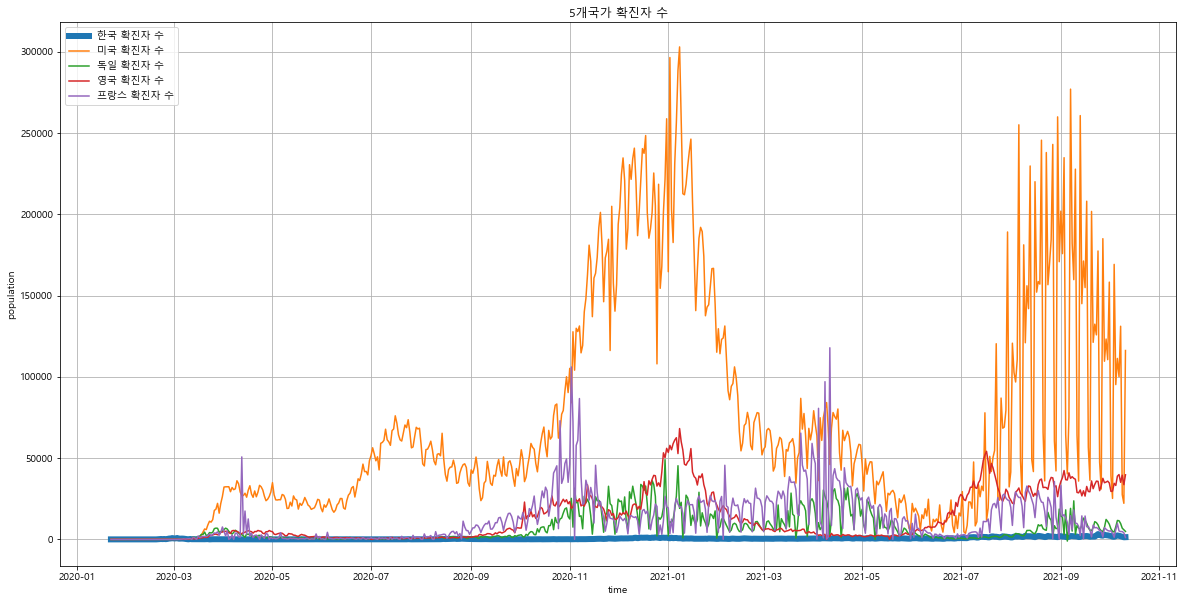

In [132]:
plt.figure(figsize=(20,10))
plt.plot(korea_confirmed["ds"], korea_confirmed["y"], label="한국 확진자 수", lw="6")
plt.plot(us_confirmed["ds"], us_confirmed["y"], label="미국 확진자 수")
plt.plot(german_confirmed["ds"], german_confirmed["y"], label="독일 확진자 수")
plt.plot(uk_confirmed["ds"], uk_confirmed["y"], label="영국 확진자 수")
plt.plot(france_confirmed["ds"], france_confirmed["y"], label="프랑스 확진자 수")
plt.grid(True)
plt.legend()
plt.title('5개국가 확진자 수')
plt.xlabel("time")
plt.ylabel("population")
plt.show()

```
한국, 미국, 독일, 영국, 프랑스 5개국만 놓고 봣을때 전체 인구수를 고려하진 않았지만,
눈에 띄게 확진자 수가 현저히 적은 것을 알 수 있다. 미국같은 경우 다른 나라에 비해 월등히 확진자 수가 많은 것으로 관찰된다.
유럽 국가의 경우 대체로 비슷한 양상을 보이나 프랑스가 특정기간 2020년 11월경, 2021년 4월 경에 유독 높은 확진자 수를 보여주고 있다.
하지만 위 데이터에서 미국, 영국, 프랑스 같은 경우 통치권 안에 들어 있는 나라까지 포함한 데이터 이기 때문에 우리가 일반적으로 생각하는 영국과, 프랑스의 데이터는 좀 상이할 것으로 예상된다.
```

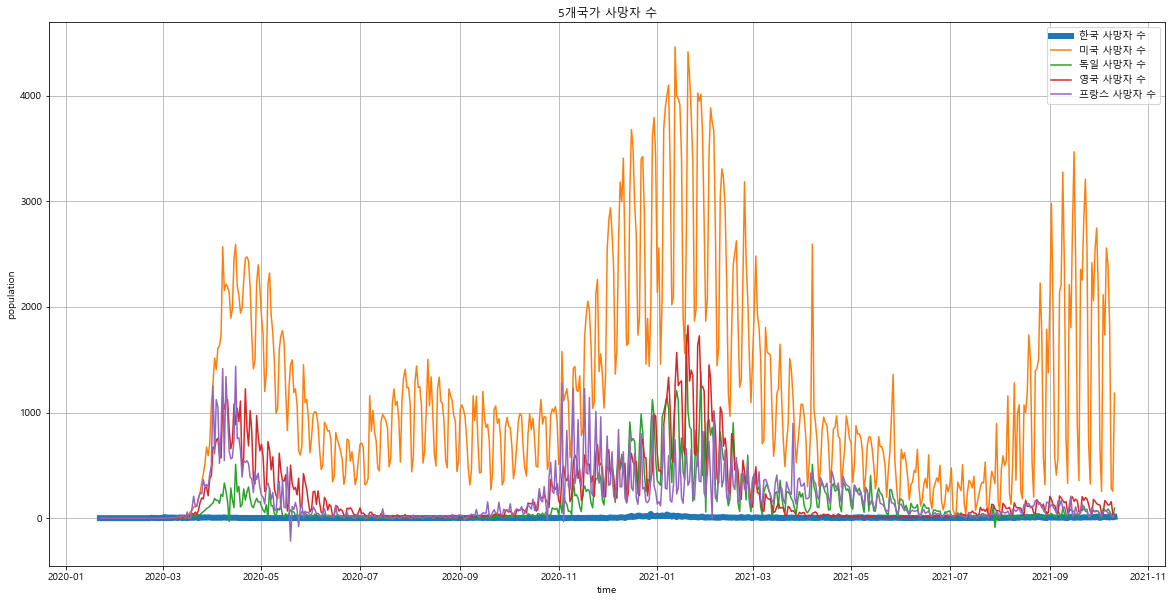

In [133]:
plt.figure(figsize=(20,10))
plt.plot(korea_death["ds"], korea_death["y"], label="한국 사망자 수", lw="6")
plt.plot(us_death["ds"], us_death["y"], label="미국 사망자 수")
plt.plot(german_death["ds"], german_death["y"], label="독일 사망자 수")
plt.plot(uk_death["ds"], uk_death["y"], label="영국 사망자 수")
plt.plot(france_death["ds"], france_death["y"], label="프랑스 사망자 수")
plt.grid(True)
plt.legend()
plt.title('5개국가 사망자 수')
plt.xlabel("time")
plt.ylabel("population")
plt.show()

```
사망자 수 비교 역시 한국이 월등히 낮다. 실제 데이터로 보면 한국은 20명 내외의 사람들이 사망자로 잡히고,
미국 및 유럽 국가들은 사망자수도 수천명 위주로 발생되는 양상으로 보인다.
위의 확진자 수와 사망자 수만으로 놓고 봣을때 한국이 어느정도 코로나 사태에 잘 대응해 나가는 것으로 볼수 있을것 같다.
하지만 아직 전체 인구대비 사망자수의 비율을 보지 않았기 때문에 실제 대응에 대해서는 조금 더 살펴봐야 할 것 같다.
```

## 5개 국가 개별적 확진자수 사망자수 시각화

### 1. 한국

- 이번엔 plot을 그리는 함수를 만들어 써보도록 하겠다.

In [134]:
def confirmAndDeath(title, confirm_data, death_data):
    plt.figure(figsize=(20,10))
    plt.plot(confirm_data["ds"], confirm_data["y"], label="확진자 수")
    plt.plot(death_data["ds"], death_data["y"], label="사망자 수")
    plt.grid(True)
    plt.legend()
    plt.title(title)
    plt.xlabel("time")
    plt.ylabel("population")
    plt.show()

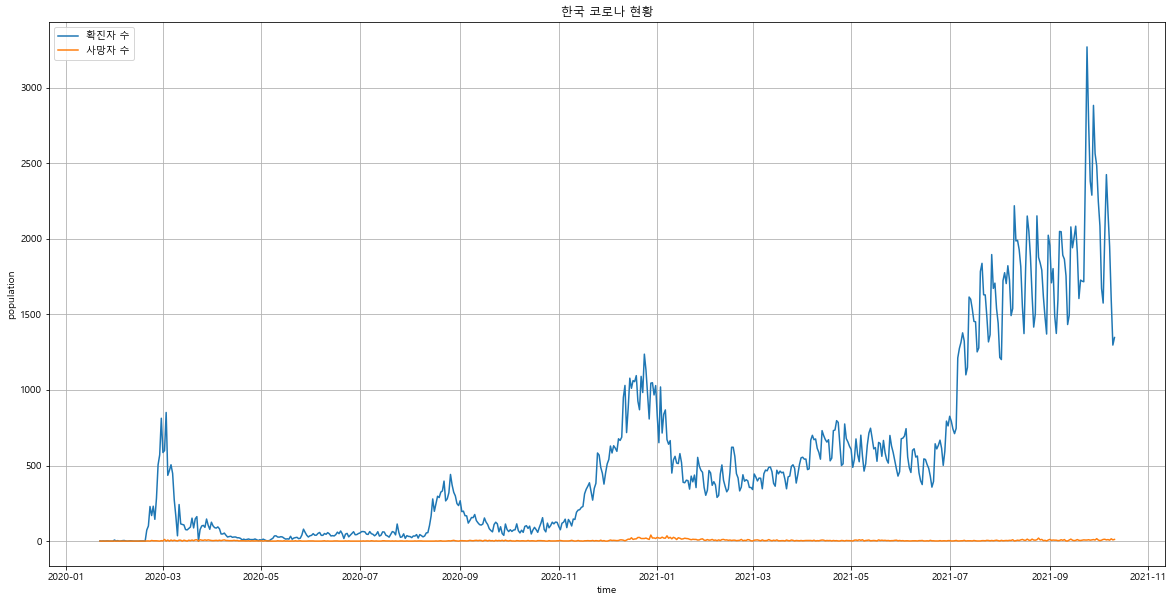

In [135]:
confirmAndDeath("한국 코로나 현황", korea_confirmed, korea_death)

```
한국 현황을 보면 확진자는 증가했다 감소하는 추세를 반복하다 7월경부터 급속도로 증가하는 추세를 보이고 있다.
전체적으로 늘어나는건 무증상확진자들이 점점 확진 판정을 같이 받아서 등 기타 여러가지 이유가 있을 수있으나 지속적으로 증가하는 확진자 추세에도
사망자 수의 증가는 보이지 않는다.
```

### 2. 미국

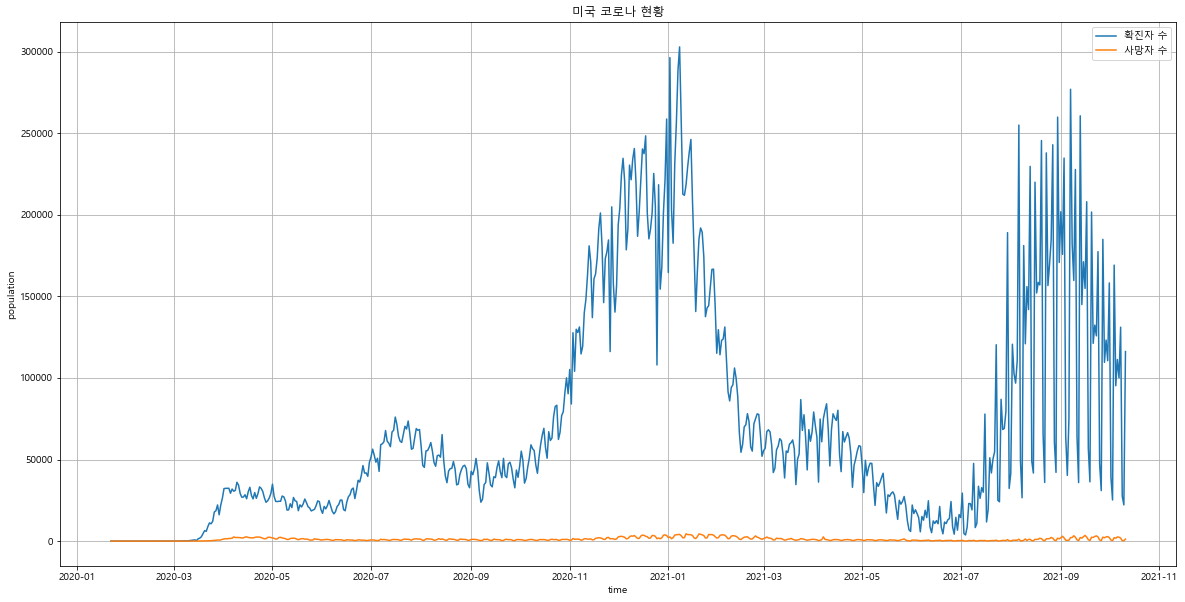

In [136]:
confirmAndDeath("미국 코로나 현황", us_confirmed, us_death)

```
미국 확진자 수 변화는 한국 확진자수 변화와 다르게 지속적으로 증가하는 추세를 보이는것이 아닌 늘었다 줄었다를 반복하는 양상을 띄고 있다. 21년 7월경 좀 잠잠해진 것으로 보이나 9월 순간 급속도로 확진자 수가 늘었던 모습을 보이고 있다.
하지만 확진자 수 대비 사망자를 봣을땐 지속적으로 늘고 있는 추세를 보이진 않아 어느정도 대응을 하고 있는 것으로 보인다. 
```

### 3. 영국

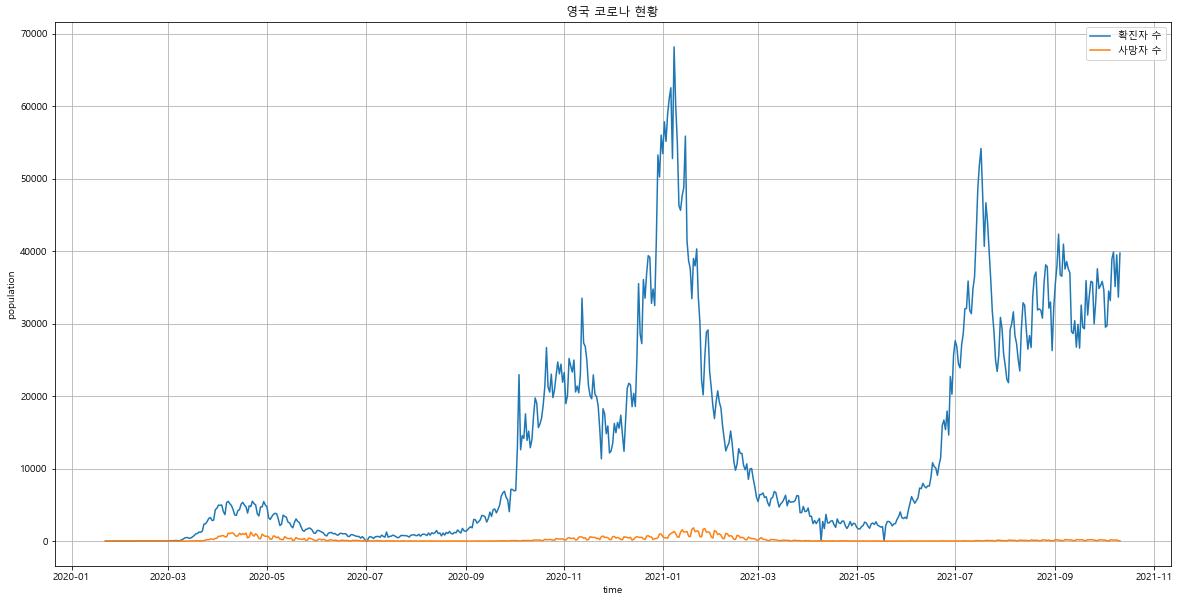

In [137]:
confirmAndDeath("영국 코로나 현황", uk_confirmed, uk_death)

```
영국은 미국과 비슷하게 확진자 수가 순간 급등했다 줄어드는 추세를 보이다 5월경 이후 급속도로 다시 증가하는 추세를 띄고 있다. 하지만 역시 사망자 수 변화 늘고있는것처럼 보이진 않는다.
```

### 4. 독일

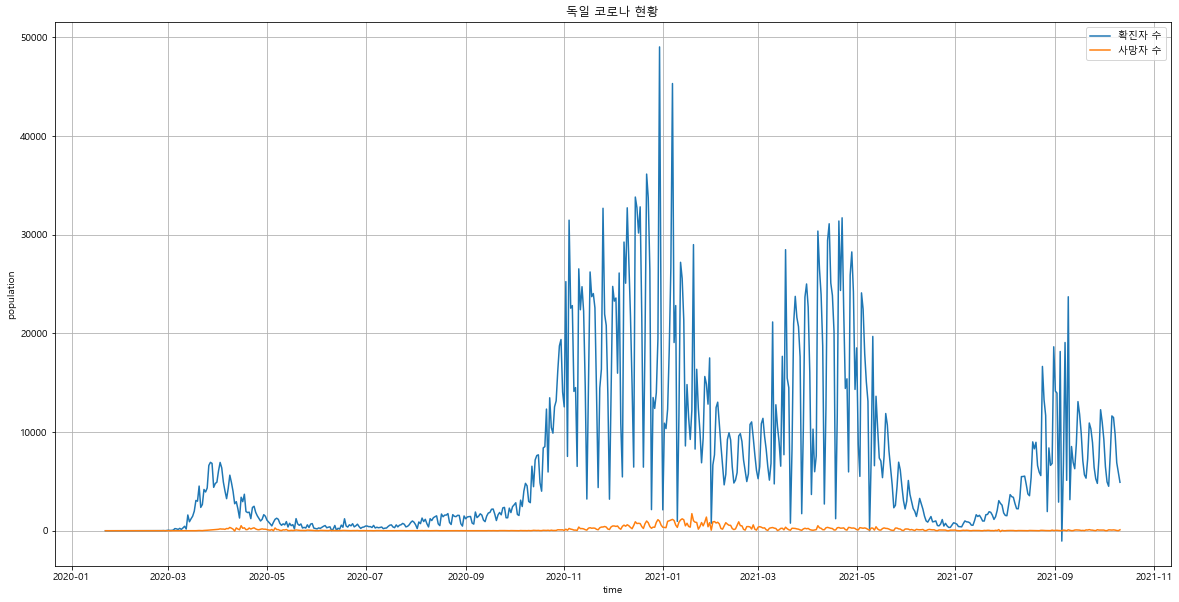

In [138]:
confirmAndDeath("독일 코로나 현황", german_confirmed, german_death)

```
독일은 미국과 마찬가지로 확진자 수가 늘었다 줄어들었다의 양상을 보여주고 있다. 9월경 급격한 증가 양상을 보였으나 다시 잠잠해지고 있는 추세 처럼 보인다. 사망자 수는 다른 국가와 마찬가지로 증가하는 것 처럼 보이진 않는다.
```

### 5. 프랑스

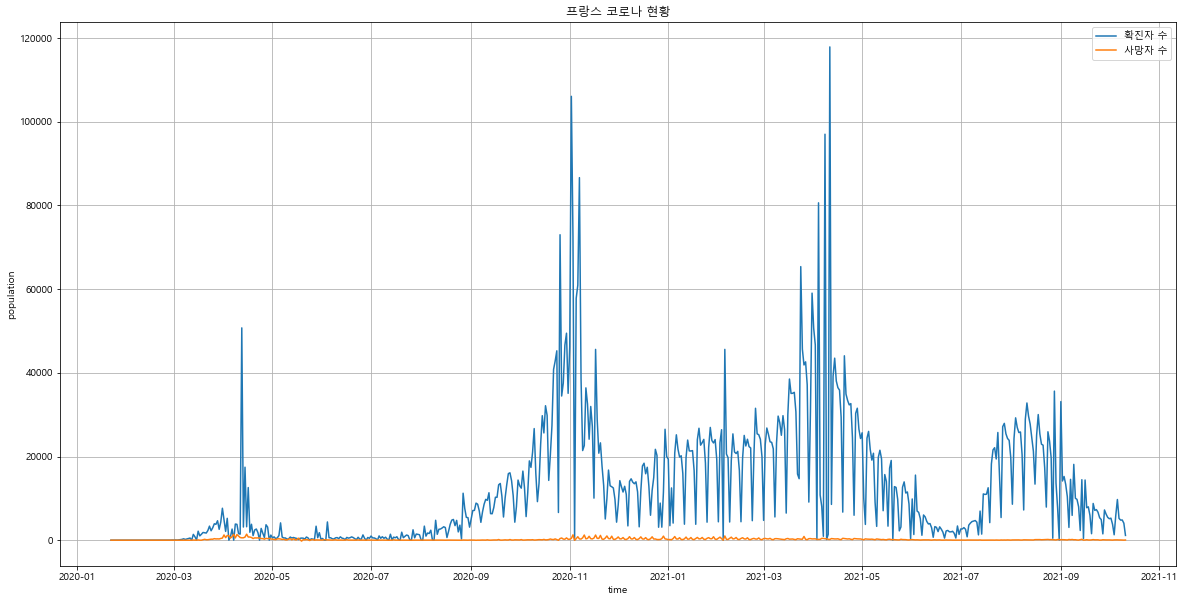

In [139]:
confirmAndDeath("프랑스 코로나 현황", france_confirmed, france_death)

```
프랑스 역시 확진자 수가 급등했다 줄어들었다를 반복하는 양상으로 보인다. 확진자 수 대비 사망자수 역시 증가하는것처럼 보이진 않는다.
```

## 한국의 방역대응능력 평가 및 시각화

- 방역 능력을 평가 하기 위해 확진자수 대비 사망자 수를 보려고 했으나 확진자 수가 급격히 느는것에 비해 사망자수의 변화가 너무 미미 하므로 유효한 데이터가 아닐 수 있을 것 같다. 
따라서 대안으로 일일 확진자수의 변화량을 살펴보도록 하자. 만약 변화량의 그래프가 증가 추세를 보이지 않는다면 어느정도 확진자 수가 더이상 늘어나진 않는것으로 볼 수 있으므로 방역 대응 능력이 있다 볼 수 있을 것이다.

In [140]:
def abilityCorrespond(title, confirm_data):
    corr = confirm_data.copy()
    for i in range(1, len(corr)):
        corr["y"][i] = confirm_data["y"][i] - confirm_data["y"][i-1]
    
    plt.figure(figsize=(20,10))
    plt.scatter(corr["ds"], corr["y"], c="g")
    plt.plot(corr["ds"], corr["y"], c="r", label="확진자 수 변화량")
    plt.title(title)
    plt.xlabel("time")
    plt.ylabel("populations")
    plt.grid(True)
    plt.legend()
    plt.show()

C:\Users\sanghui\AppData\Local\Temp/ipykernel_8796/3122770186.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr["y"][i] = confirm_data["y"][i] - confirm_data["y"][i-1]


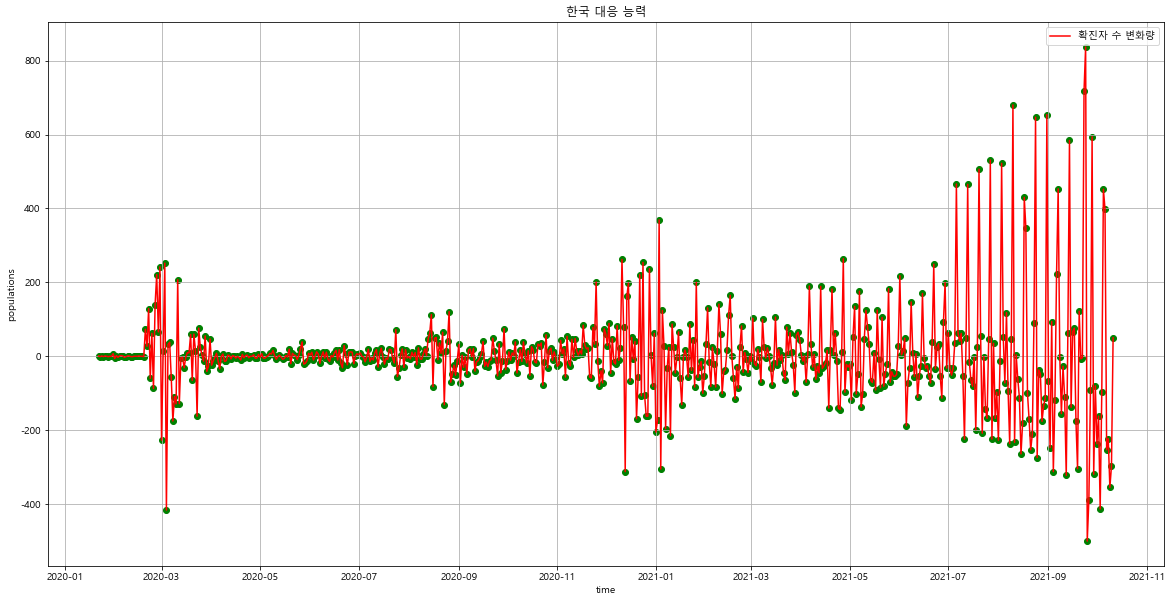

In [141]:
abilityCorrespond("한국 대응 능력", korea_confirmed)

```
위 차트를 보면 그래프가 y = 0 즉 population = 0 축에 가깝게 파동을 만들수록, 혹은 음수 값을 갖는 경향을 띄도록
그래프가 형성되어야 좋은것임을 알 수 있다. 그런데 한국을 보면 초반에 잠시 변동폭이 컷으나, 점차 안정화 되다 갑자기 점점 큰 변동폭을 갖는것으로 보아
대응 능력이 좋다고 보긴 힘들수도 있을 것 같다.
```

C:\Users\sanghui\AppData\Local\Temp/ipykernel_8796/3122770186.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr["y"][i] = confirm_data["y"][i] - confirm_data["y"][i-1]


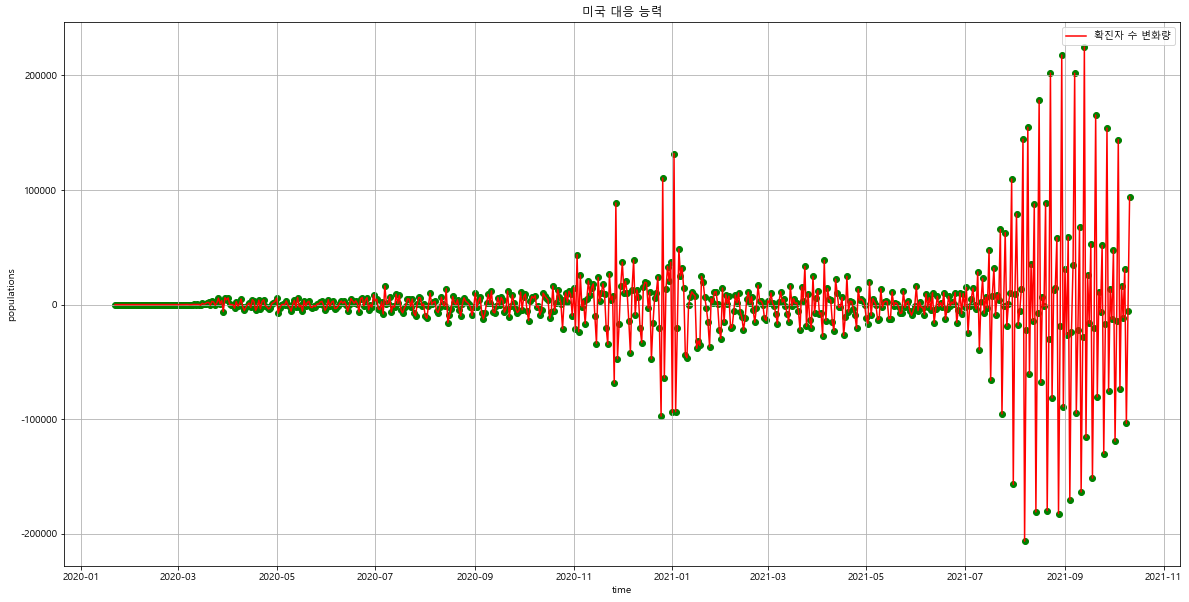

In [142]:
abilityCorrespond("미국 대응 능력", us_confirmed)

```
미국 역시 한국과 비슷한 양상으로 점점 큰 변동폭을 갖는것으로 보아 코로나 대응에 고전 하고 있다 볼 수 있을것 같다.
```

C:\Users\sanghui\AppData\Local\Temp/ipykernel_8796/3122770186.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr["y"][i] = confirm_data["y"][i] - confirm_data["y"][i-1]


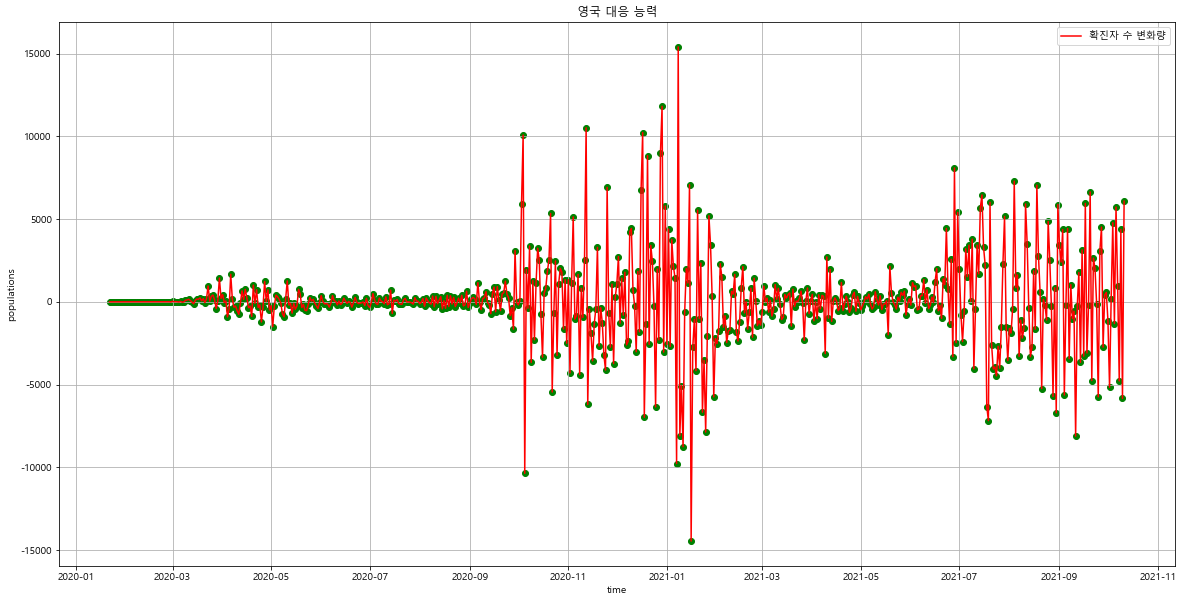

In [143]:
abilityCorrespond("영국 대응 능력", uk_confirmed)

```
영국의 경우 큰 변동을 갖다 점차 폭이 줄어드는 것으로 보아 어느정도 대응을 하고 있다고 볼 수 있을것 같다.
```

C:\Users\sanghui\AppData\Local\Temp/ipykernel_8796/3122770186.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr["y"][i] = confirm_data["y"][i] - confirm_data["y"][i-1]


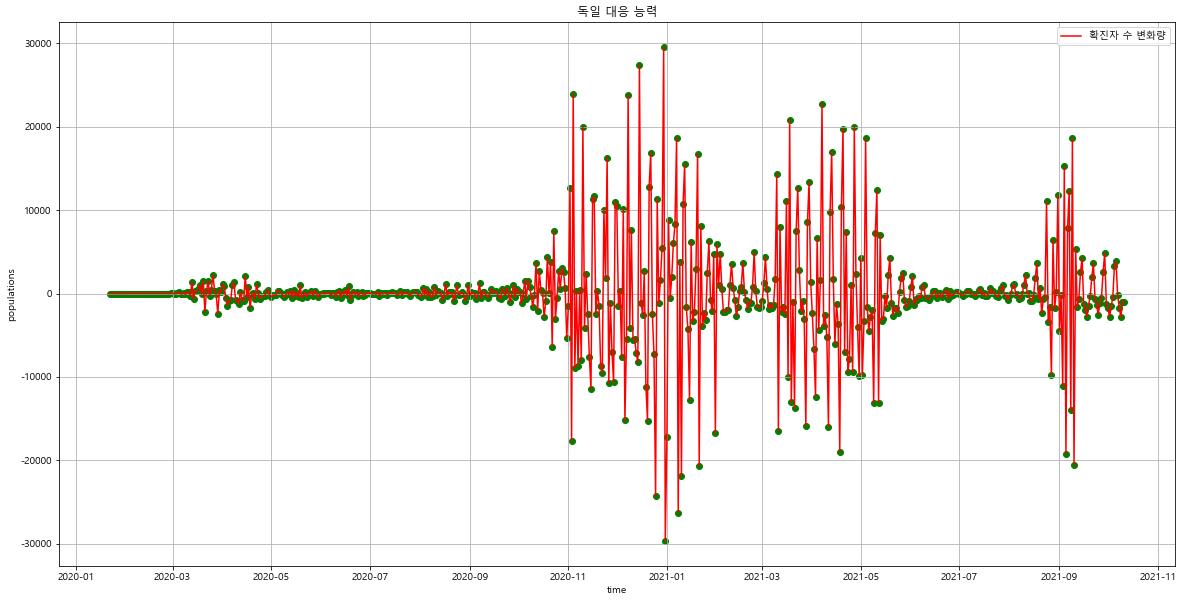

In [144]:
abilityCorrespond("독일 대응 능력", german_confirmed)

C:\Users\sanghui\AppData\Local\Temp/ipykernel_8796/3122770186.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr["y"][i] = confirm_data["y"][i] - confirm_data["y"][i-1]


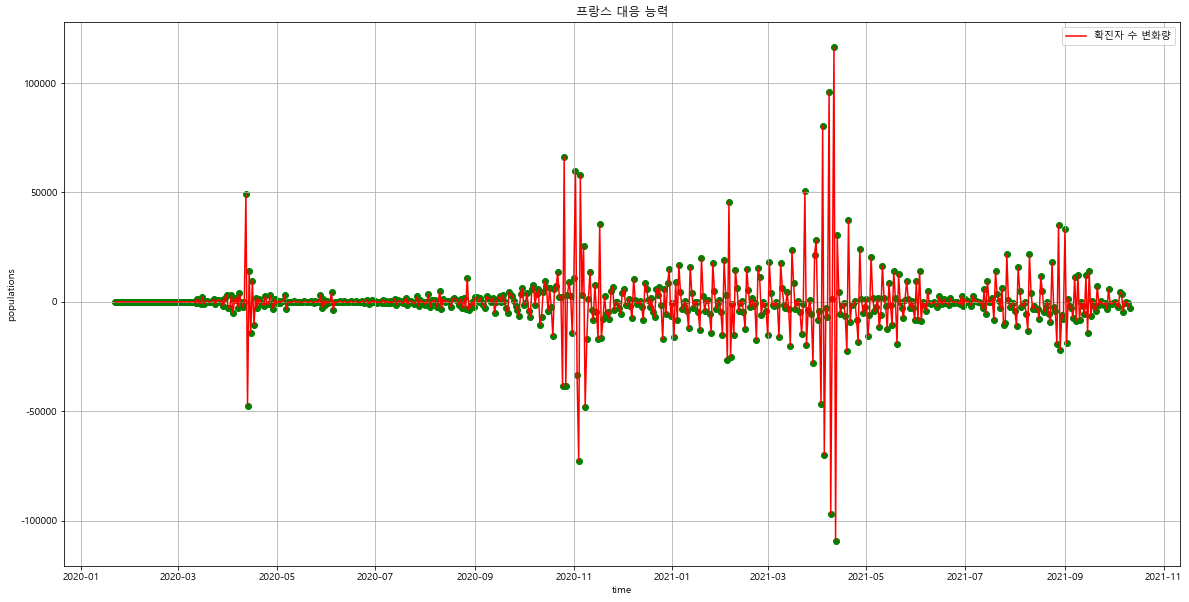

In [145]:
abilityCorrespond("프랑스 대응 능력", france_confirmed)

```
위의 데이터들을 종합해보면 한국과 미국은 점점 변화폭이 커지는 경향을 보엿다. 이와 반대로 유럽 국가인 영국, 프랑스, 독일의 경우 변화폭이 커지는 것이 아닌 일정한 형태의 변화만 보이는 것으로 보인다.
각각 이전 변동폭을 고려해봤을때 유럽의 경우 변동폭이 줄어드는것이 아닌 주기적으로 급격히 느는 변화폭을 반복하는 모습으로 보였다. 따라서 대응을 잘하다 잠시 크게 늘어나는 확진자 수에 대응을 하는 양상을 띄는것으로 추측된다.
반대로 한국과 미국은 어느정도 잘 대응을 해오다가 급격히 늘어나는 추세에 잘 대응을 하지 못하는것으로 보여 기존과 다른 추가적인 대응이 필요해 보인다.
```

---

# 문제 4. 각국 전체 인구수 대비 비율로 비교해보기

- 지금까지는 각국의 데이터만 놓고 살펴보았고 이젠 각국 전체 인구수 대비 비율로 환산해 실질적으로 어떤 현황을 갖고 있는지 좀 더 구체적으로 살펴보도록 하자

- 출처: 구글(2020년) 총인구수 검색결과
- 대한민국 : 5178만
- 미국: 3.295억
- 영국: 6722만
- 독일: 8324만
- 프랑스: 6739만

In [146]:
def applyTotalPopulation(dataSet, population):
    apply = dataSet.copy()
    apply["y"] =  (apply["y"] / population) * 10e3
    return apply

In [147]:
# 시각화를 위한 새로운 데이터 프레임 생성
pop_korea_confirmed = applyTotalPopulation(korea_confirmed, 51780000)
pop_us_confirmed = applyTotalPopulation(us_confirmed, 329500000)
pop_uk_confirmed = applyTotalPopulation(uk_confirmed, 67220000)
pop_german_confirmed = applyTotalPopulation(german_confirmed, 83240000)
pop_france_confirmed = applyTotalPopulation(france_confirmed, 67390000)

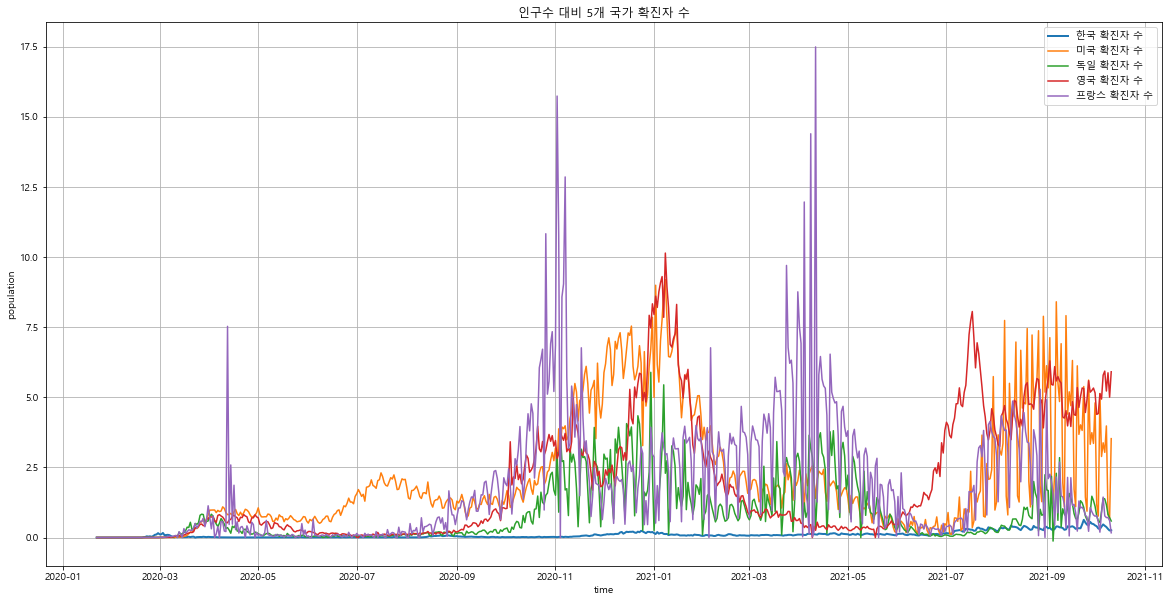

In [148]:
plt.figure(figsize=(20,10))
plt.plot(pop_korea_confirmed["ds"], pop_korea_confirmed["y"], label="한국 확진자 수", lw="2")
plt.plot(pop_us_confirmed["ds"], pop_us_confirmed["y"], label="미국 확진자 수")
plt.plot(pop_german_confirmed["ds"], pop_german_confirmed["y"], label="독일 확진자 수")
plt.plot(pop_uk_confirmed["ds"], pop_uk_confirmed["y"], label="영국 확진자 수")
plt.plot(pop_france_confirmed["ds"], pop_france_confirmed["y"], label="프랑스 확진자 수")
plt.grid(True)
plt.legend()
plt.title('인구수 대비 5개 국가 확진자 수')
plt.xlabel("time")
plt.ylabel("population")
plt.show()

```
전체 인구수를 고려하지 않았던 위의 차트와 달리 상이한 모습을 보여준다. 한국은 여전히 인구수 대비 확진자 수면에서도 다른 국가에 비해 현저히 적은 비율을 나타내는것을 관찰할 수 있다.
특이한 점은 미국이 전체 확진자수만으로 놓고봣을땐 다른 국가에 비해 압도적으로 많지만, 전체 인구수 대비로 했을떈 한국과 전체 인구수가 비슷한 유럽 국가가 높은 비율을 나타내는것을 확인할 수 있다.
이 데이터로 근거 삼아 위에서 봣엇던 대응능력에 있어서 한국이 다른 국가에 비해 잘 대응하고 있다고 볼 수 있을것 같다.
```

In [149]:
# 인구수 대비 사망률 시각화를 위한 새로운 데이터 생성
pop_korea_death = applyTotalPopulation(korea_death, 51780000)
pop_us_death = applyTotalPopulation(us_death, 329500000)
pop_uk_death = applyTotalPopulation(uk_death, 67220000)
pop_german_death = applyTotalPopulation(german_death, 83240000)
pop_france_death = applyTotalPopulation(france_death, 67390000)

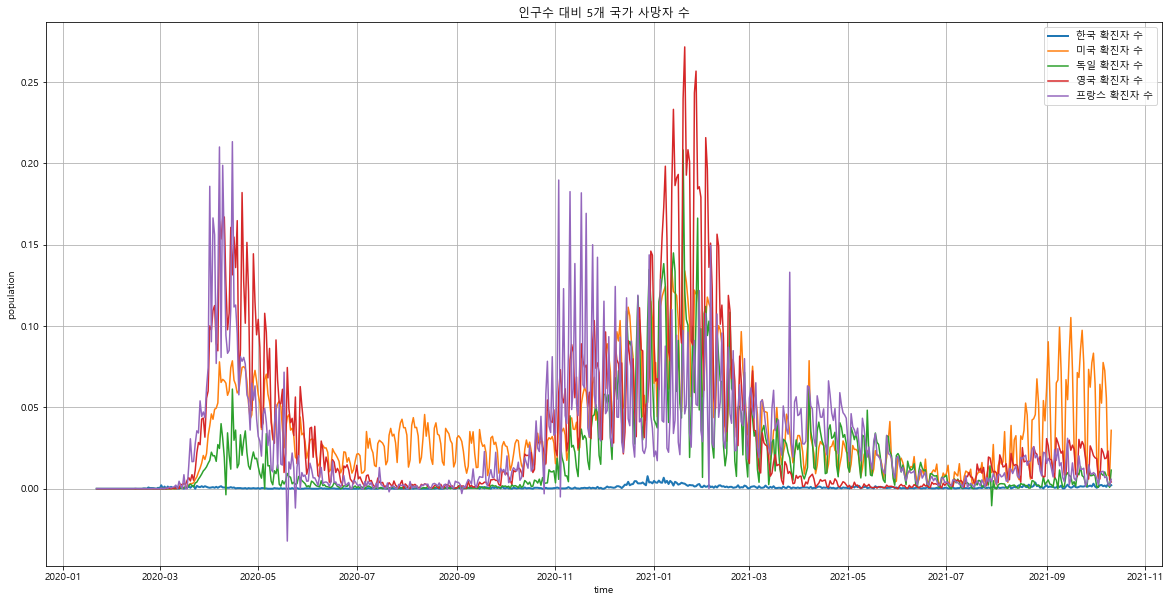

In [150]:
plt.figure(figsize=(20,10))
plt.plot(pop_korea_death["ds"], pop_korea_death["y"], label="한국 확진자 수", lw="2")
plt.plot(pop_us_death["ds"], pop_us_death["y"], label="미국 확진자 수")
plt.plot(pop_german_death["ds"], pop_german_death["y"], label="독일 확진자 수")
plt.plot(pop_uk_death["ds"], pop_uk_death["y"], label="영국 확진자 수")
plt.plot(pop_france_death["ds"], pop_france_death["y"], label="프랑스 확진자 수")
plt.grid(True)
plt.legend()
plt.title('인구수 대비 5개 국가 사망자 수')
plt.xlabel("time")
plt.ylabel("population")
plt.show()

```
전체 인구수를 고려하였을때 사망자수 비율 역시 이전과 상이한 결과를 보여준다. 한국은 다른 국가에 비해 인구수 대비 미미한 사망자수를 보여준다. 하지만 유럽의 전체 인구수 대비 사망자가 미국을 앞지르는 것으로 보아
유럽이 이번 코로나 사태에 제대로 대응하지 못하고 있을을 시사한다고 볼 수 있을것 같다. 특히 영국과 프랑스의 경우 전체 인구수를 고려하지 않아도 확진자와 사망자가 많은 축에 속했었는데, 인구수를 고려했을때 다른 국가에 비해
월등히 높은 모습을 보여주고 있다.
```

---

# 문제 5

## 각각의 나라 데이터 시계열 분석해보고 트렌드 살펴보기

In [151]:
from fbprophet import Prophet

- 위의 확진자와 사망자 데이터가 6개월 내외로 큰 변화를 보이는 것을 알 수 있다. 따라서 fbprophet을 이용해 period를 180으로 주고 경향을 파악해보자

## 한국

### 확진자 수

In [152]:
df = pd.DataFrame({"ds": korea_confirmed["ds"], "y": korea_confirmed["y"]})
df.head()
m = Prophet(yearly_seasonality=True,  daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=180)
forecast = m.predict(future)

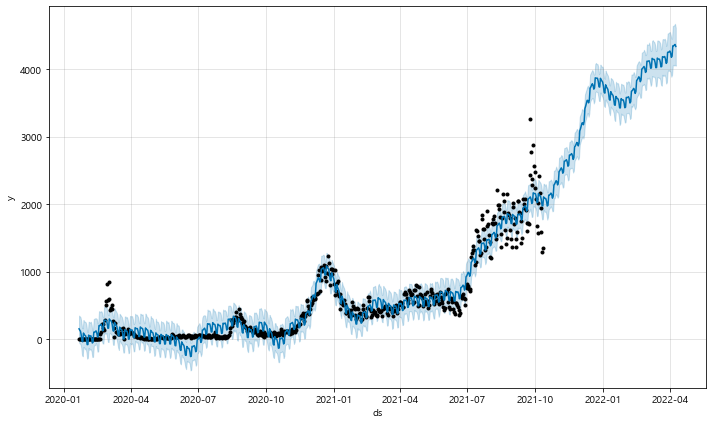

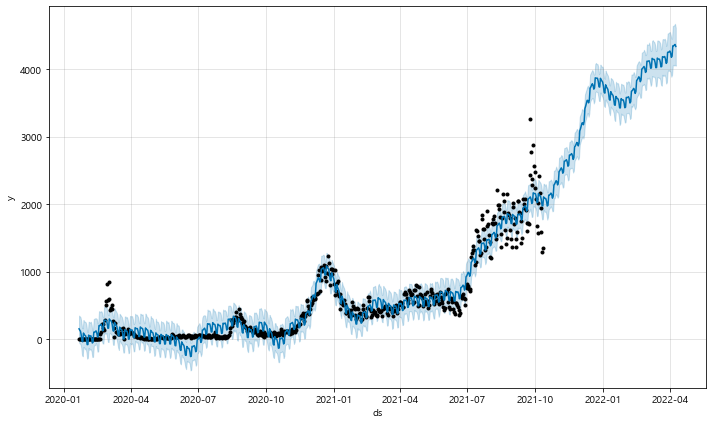

In [153]:
m.plot(forecast)

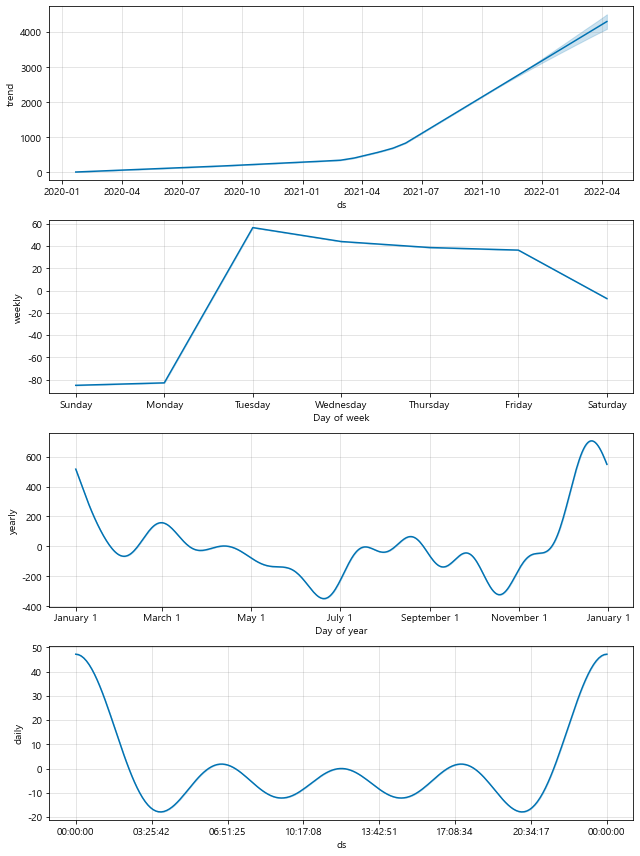

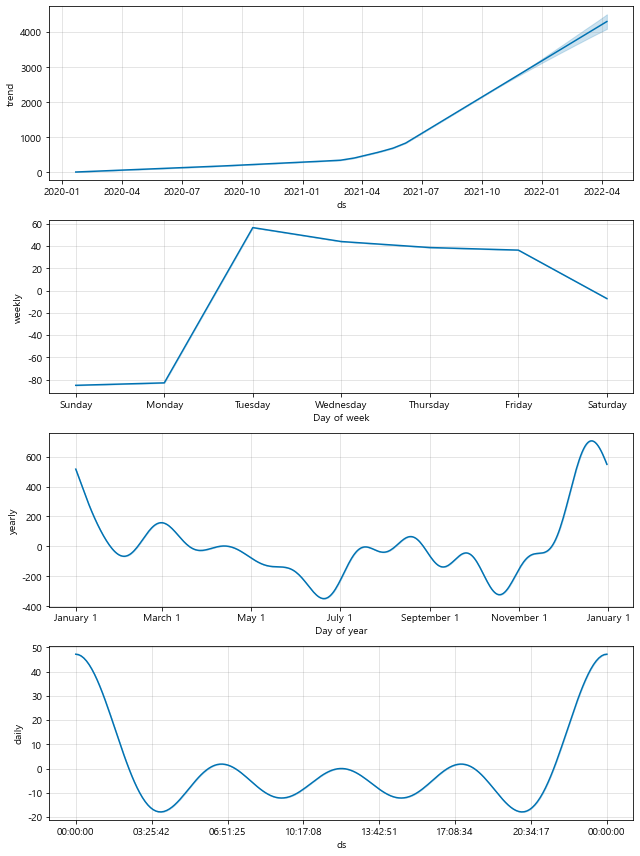

In [154]:
m.plot_components(forecast)

```
지금 한국 확진자 수가 증가하는 추세를 반복한다면 일일 확진자 수가 4000명을 넘어갈수도 있다는 예측 결과가 나온다.
하지만 백신 접종 및 사회적 거리두기 확대등 여러 방안들을 진행하고 있으므로 가능성이 있다고 볼수 있다.
또한, 트렌드 그래프를 보게되면 평이하다 급격히 증가하는 모습을 보여주고 있다. 확진자 수가 급격히 커지는 트렌드를 보임을 알 수 있다.
또한 기간을 놓고 봣을떄 보통 날씨가 추운 11월부터 2월 사이 확진자 수가 급격히 증가하는 모습을 보여주고 있다.
```

### 사망자 수

In [155]:
df = pd.DataFrame({"ds": korea_death["ds"], "y": korea_death["y"]})
df.head()
m = Prophet(yearly_seasonality=True,  daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=180)
forecast = m.predict(future)

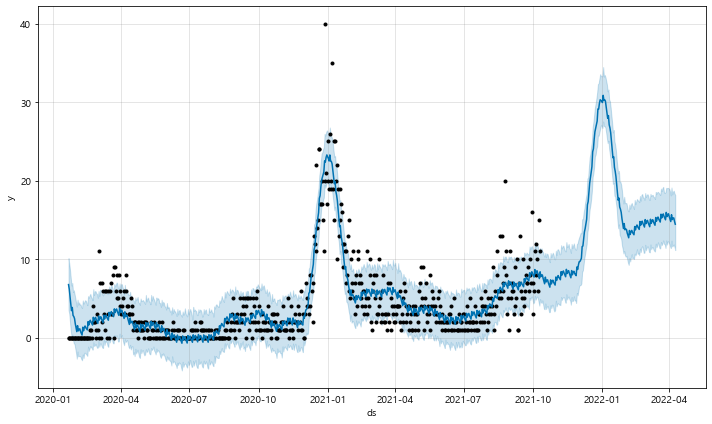

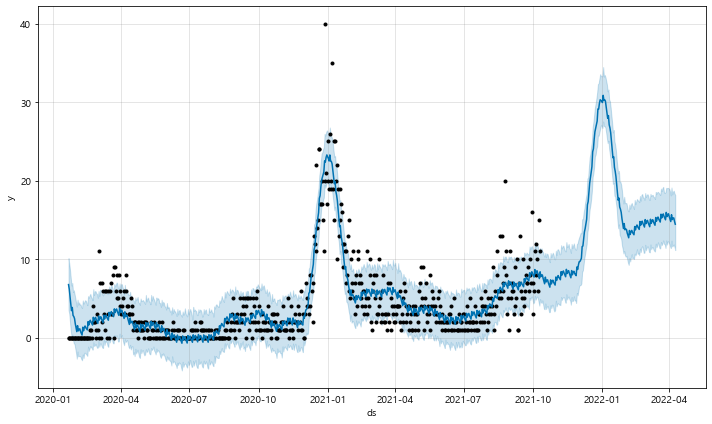

In [156]:
m.plot(forecast)

```
올 초 1월경 사망자수가 급격히 늘어낫던 자료 떄문인진 모르겠으나 다가오는 22년 1월경에 사망자수가 급격히 늘어날 수 있다는 예측 결과가 나왔다.
전체적으로 봣을때 꾸준히 증가하는 추세를 보여준다.
```

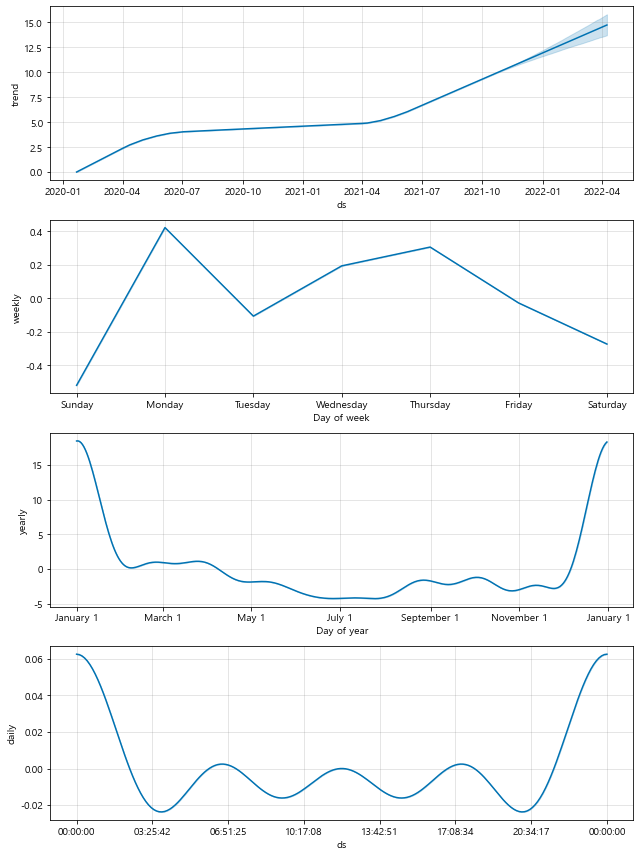

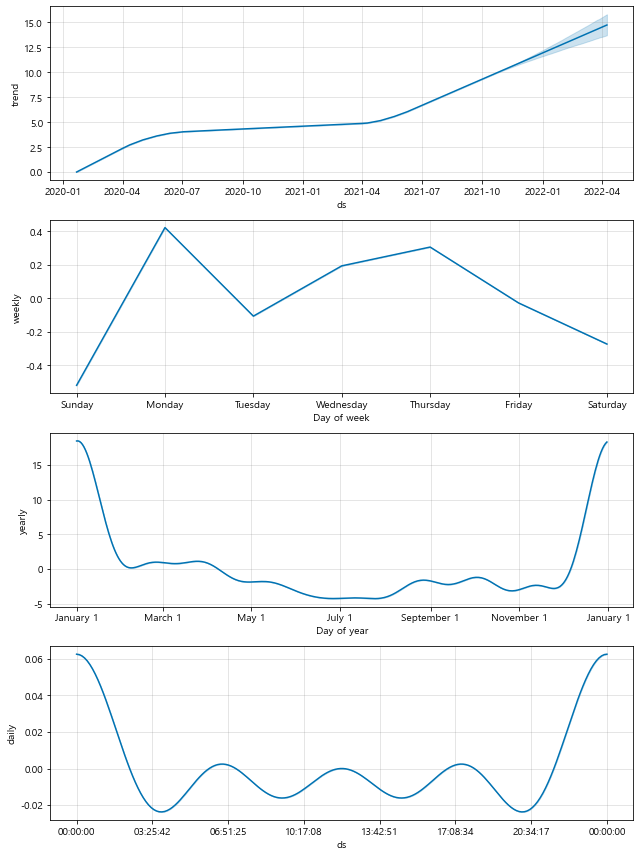

In [157]:
m.plot_components(forecast)

```
사망자 트렌드 역시 확진자 수와 비슷한 양상을 보여준다.
```

## 미국

### 확진자

In [158]:
df = pd.DataFrame({"ds": us_confirmed["ds"], "y": us_confirmed["y"]})
df.head()
m = Prophet(yearly_seasonality=True,  daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=180)
forecast = m.predict(future)

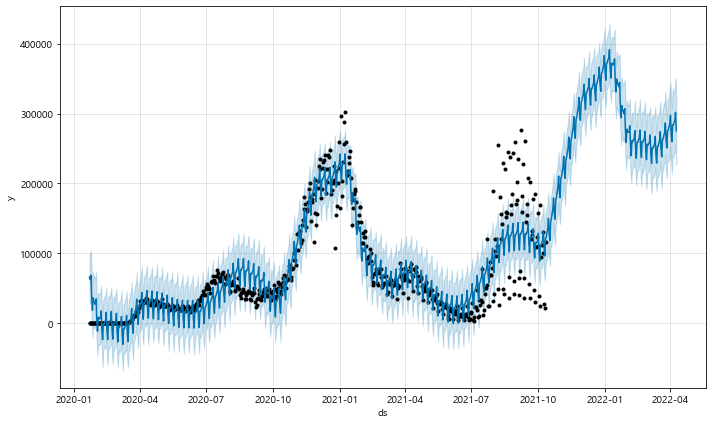

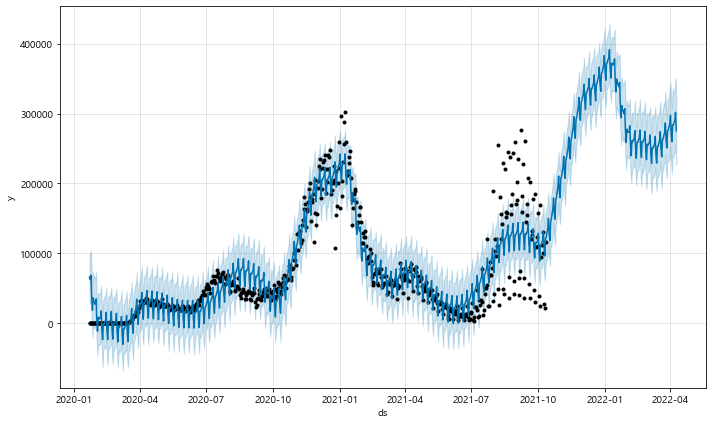

In [159]:
m.plot(forecast)

```
미국 확진자 수 역시 한국 확진자 수 증가양상과 비슷한 양상을 보여준다. 1월에 급격하게 뛰면서 점차 올라가는 추세를 나타내는 결과가 나왔다.
```

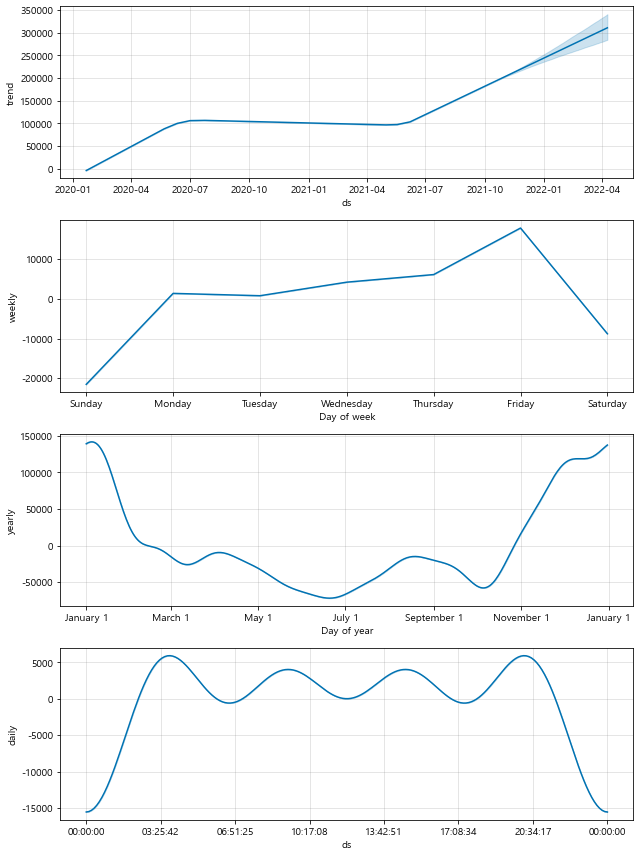

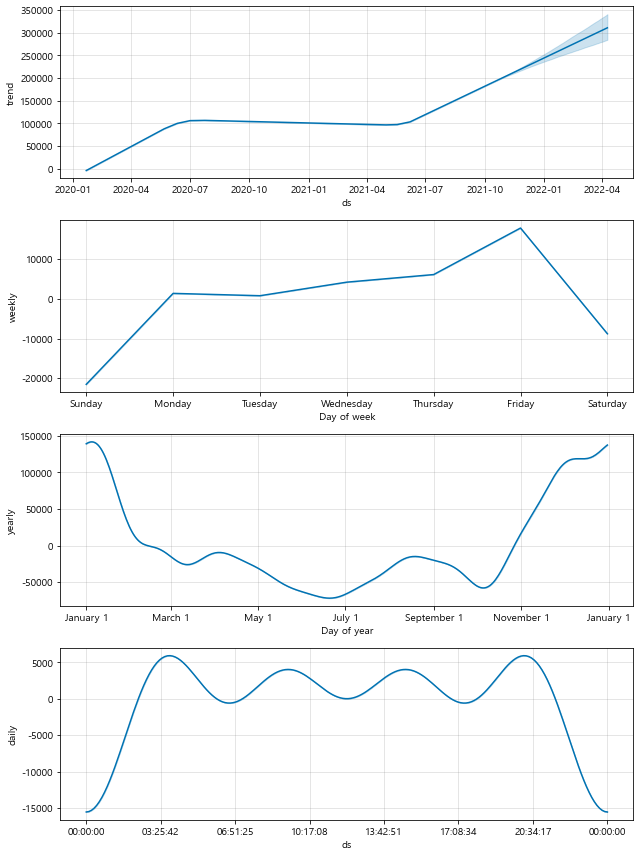

In [160]:
m.plot_components(forecast)

```
트렌드 분석 역시 한국과 비슷한 결과가 나왔다. 보통 날씨가 추워지는 시점에 급격히 확진자 수가 늘어나는 추세를 보이고 전체적인 경향으로는 21년 이후 급격히 가파라지는 추세이다.
```

### 사망자

In [161]:
df = pd.DataFrame({"ds": us_death["ds"], "y": us_death["y"]})
df.head()
m = Prophet(yearly_seasonality=True,  daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=180)
forecast = m.predict(future)

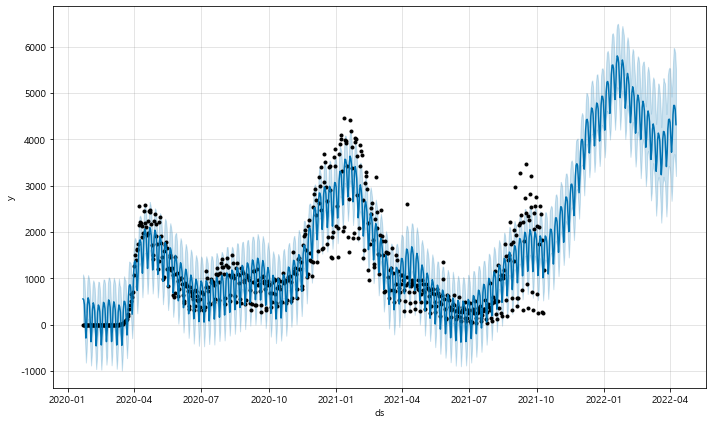

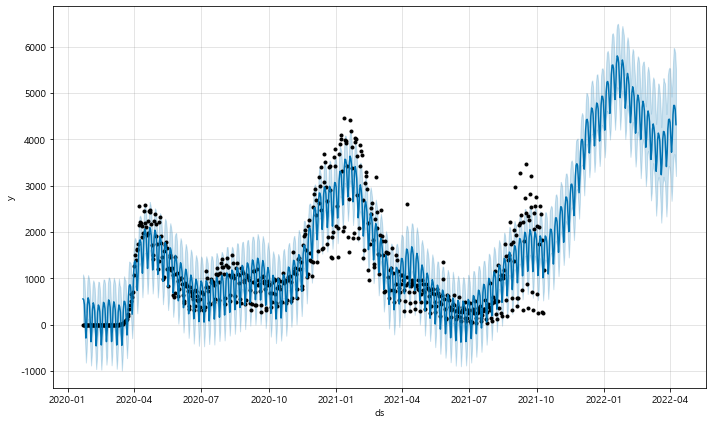

In [162]:
m.plot(forecast)

```
사망자 추세 변화 역시 한국과 비슷하다. 다만 차이점이 있다면, 1월경 급격하게 수치가 높아지는 한국과 달리, 전반적으로 점점 늘어나는 추세를 보이는것이 특징으로 보인다.
```

## 영국

### 확진자

In [163]:
df = pd.DataFrame({"ds": uk_confirmed["ds"], "y": uk_confirmed["y"]})
df.head()
m = Prophet(yearly_seasonality=True,  daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=180)
forecast = m.predict(future)

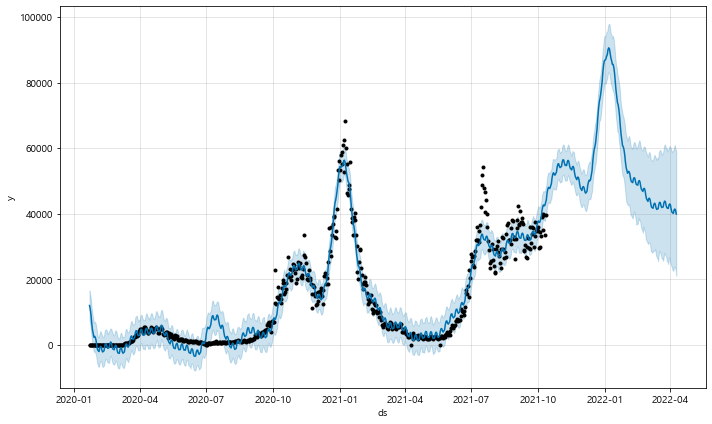

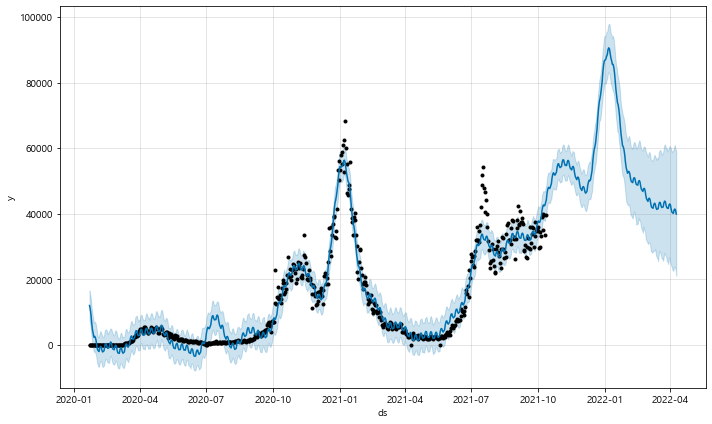

In [164]:
m.plot(forecast)

```
영국은 한국과 미국과는 달리 좀다른 추세를 보여준다. 똑같이 1월경에 급격히 상승할수도 있는 가능성을 암시하나 이후 다시 진정되는 모습을 보여주는것으로 예측되었다.
``

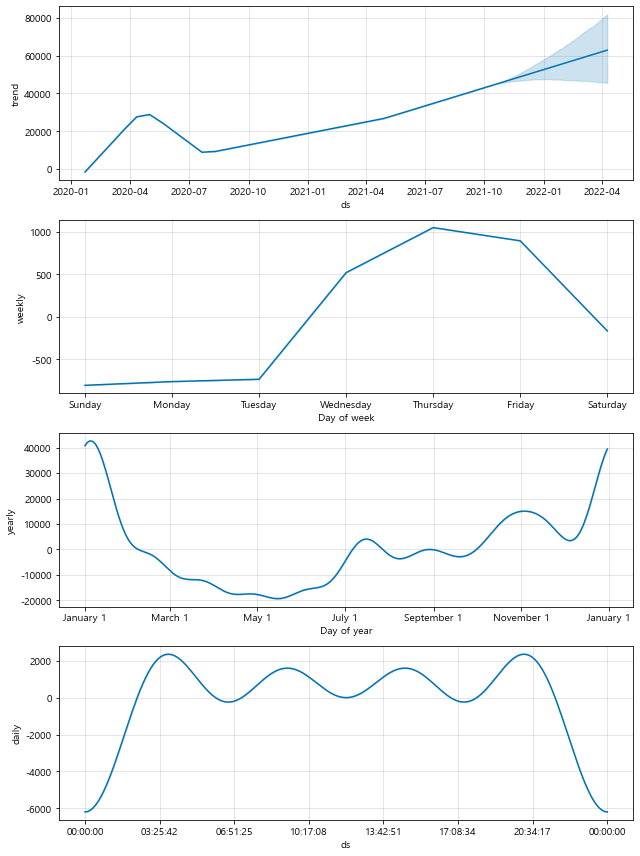

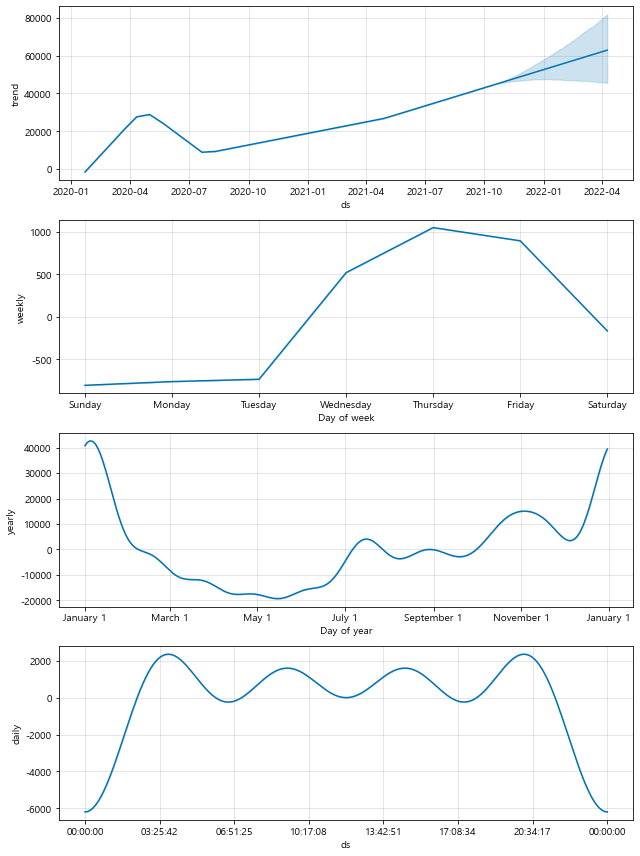

In [165]:
m.plot_components(forecast)

```
트렌드 경향 역시 한국과 미국과는 상이하다. 
거의 변화가 없었다가 급격하게 증가하는 모습을 보이는 한국, 미국과는 달리 영국은 지속적으로 늘어나고 있는 트렌드를 보여주고 있다.
```

### 사망자

In [166]:
df = pd.DataFrame({"ds": uk_death["ds"], "y": uk_death["y"]})
df.head()
m = Prophet(yearly_seasonality=True,  daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=180)
forecast = m.predict(future)

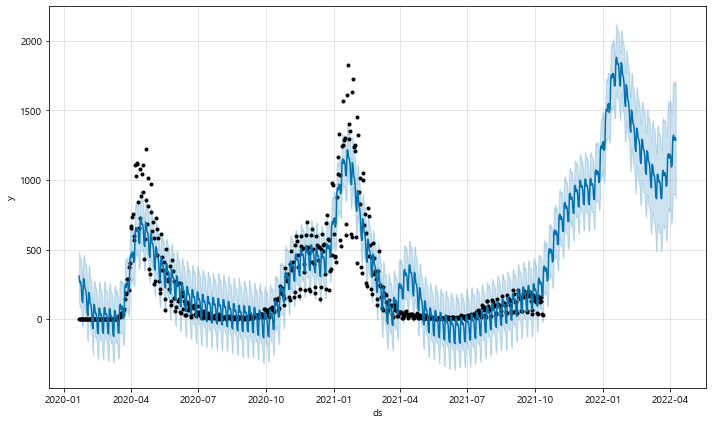

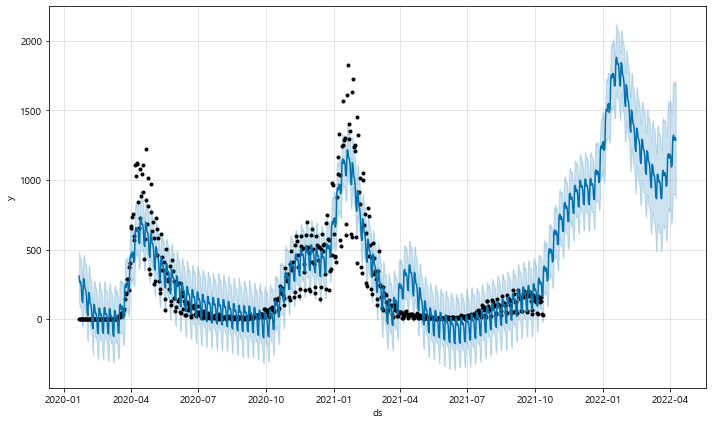

In [167]:
m.plot(forecast)

```
사망자 수 역시 다르게 전개될수 있음을 보여주고 있다. 한국, 미국은 사망자수가 급격히 증가하긴 해도 진정될 가능성이 있는 추세가 이어지는 반면, 영국은 또한번 급격히 높아질수 있는 가능성이 보이는 것 같다.
```

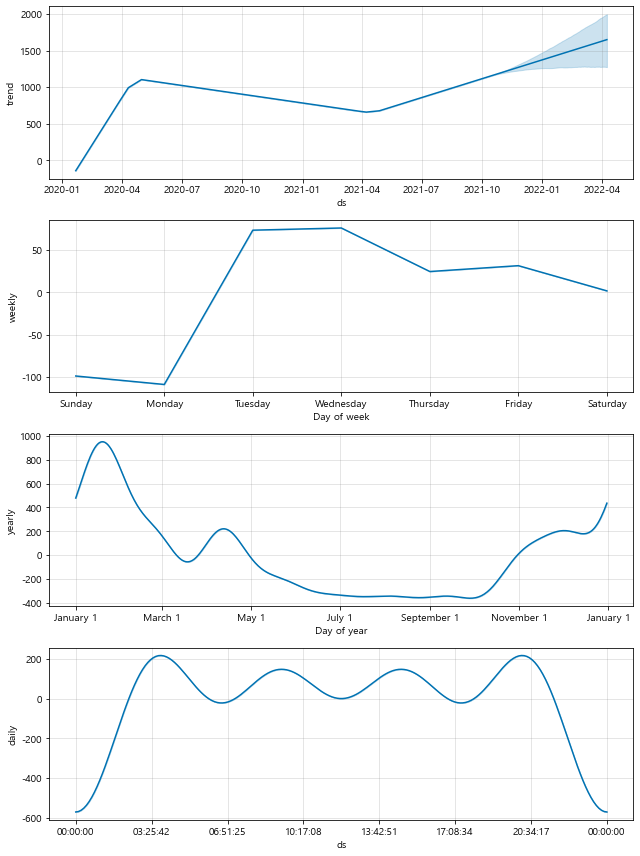

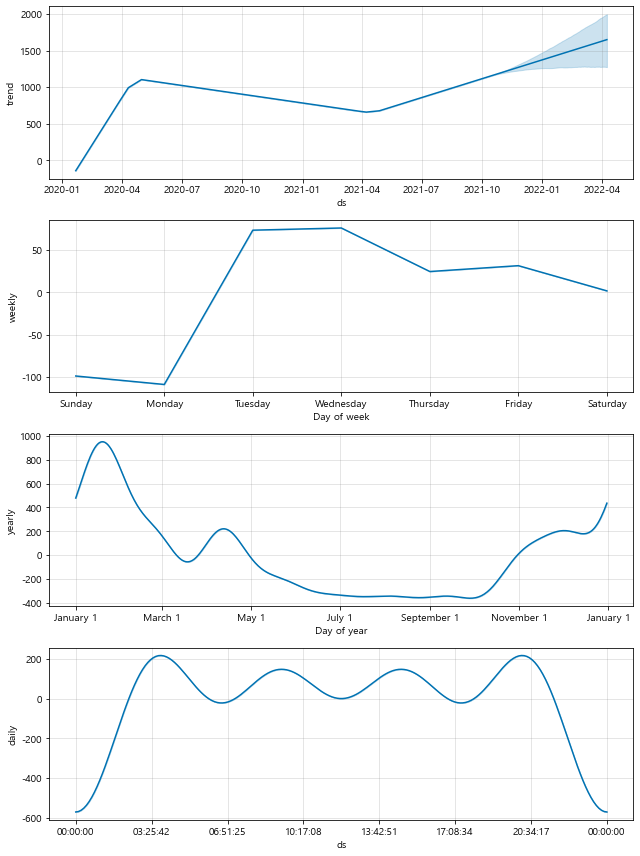

In [168]:
m.plot_components(forecast)

```
사망자 경향 역시 급격히 증가하는 한국, 미국과는 달리 전체적으로 늘었다 줄었다를 반복하는 경향을 보이는 것으로 관찰된다. 
또한 날씨가 추울때만 확진자와 사망자 수가 많았던 한국, 미국과는 달리 봄철까지 추세를 이어가는 것이 눈에 띈다.
```

## 프랑스

### 확진자

In [169]:
df = pd.DataFrame({"ds": france_confirmed["ds"], "y": france_confirmed["y"]})
df.head()
m = Prophet(yearly_seasonality=True,  daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=180)
forecast = m.predict(future)

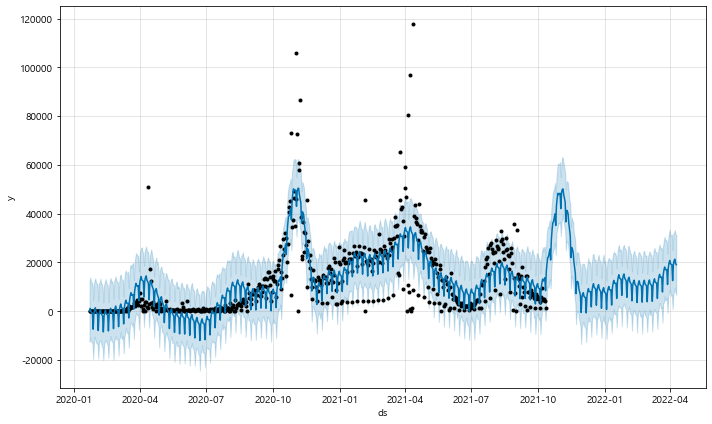

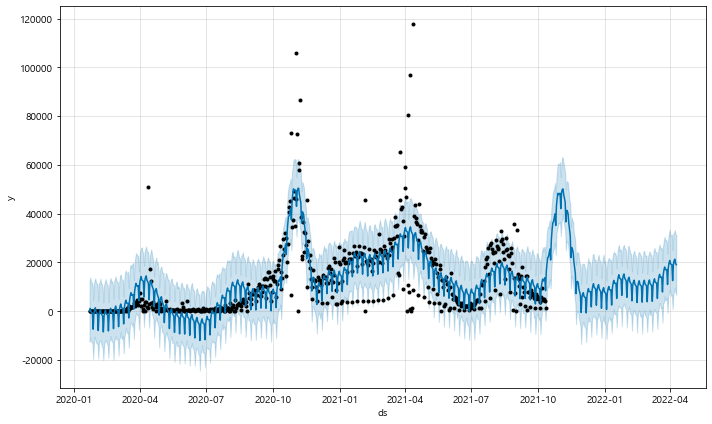

In [170]:
m.plot(forecast)

```
프랑스는 여태 다른나라와 다르게 급격히 늘어나는 추세를 보여주진 않는다. 
비슷한 양상을 보이며 다른 국가와 다르게 좀더 빠른 21년 10월경에 한번 크게 증가 했다 이후 다시 잠잠해 지는 양상을 띄고 있다.
```

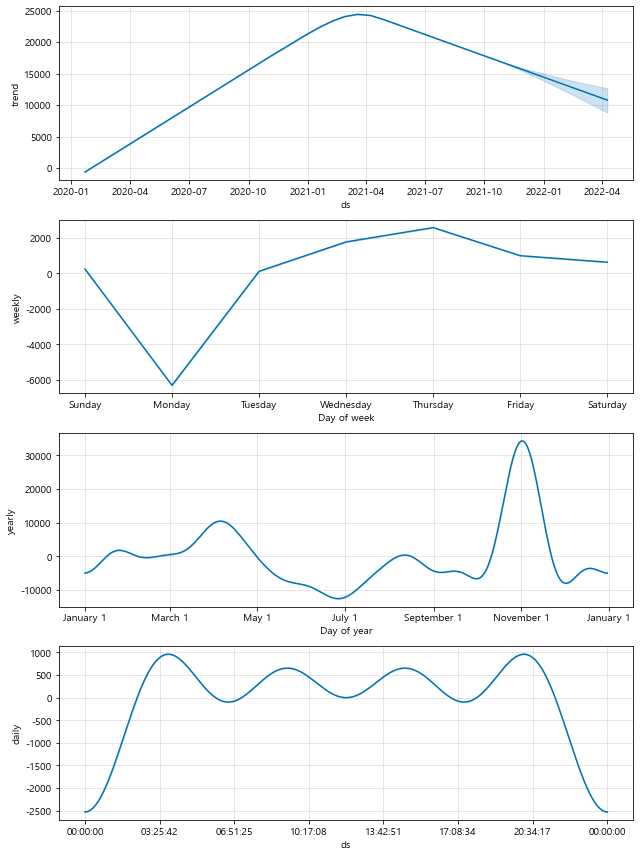

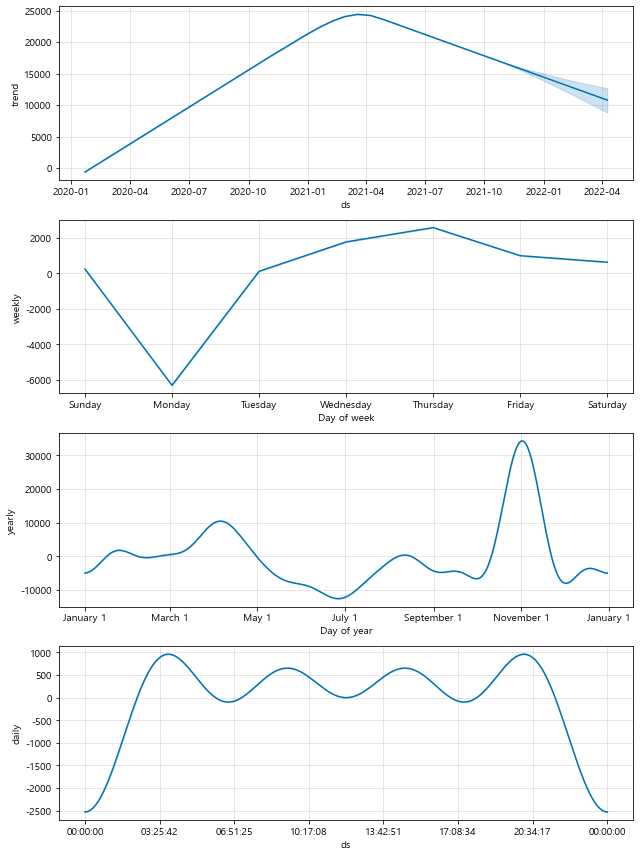

In [171]:
m.plot_components(forecast)


```
추세 변화 역시 인상적이다. 다른 국가는 지속적으로 증가하는 추세를 띄는 한편 프랑스는 올라갓다 내려가는 추세를 나타 내고 있다.
또한 1월경 확실히 확진자나 사망자수가 많았던 다른 국가와는 달리 11월경이 가장 높은 데이터 수치를 나타내고 전반적으로
그래프가 뒤집힌 모습을 보이는게 인상적이다.
```

### 사망자

In [172]:
df = pd.DataFrame({"ds": france_death["ds"], "y": france_death["y"]})
df.head()
m = Prophet(yearly_seasonality=True,  daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=180)
forecast = m.predict(future)

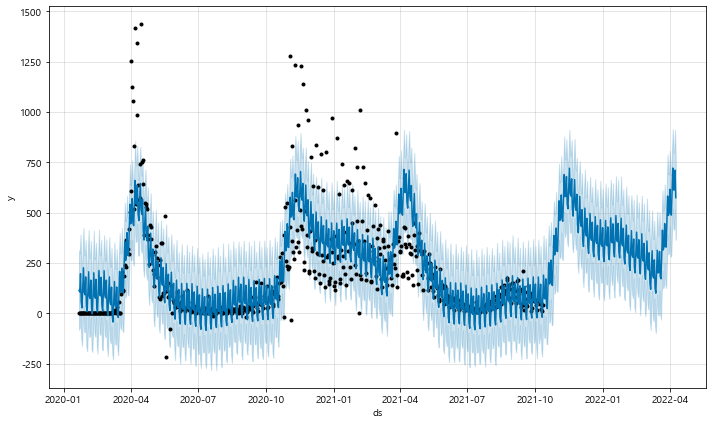

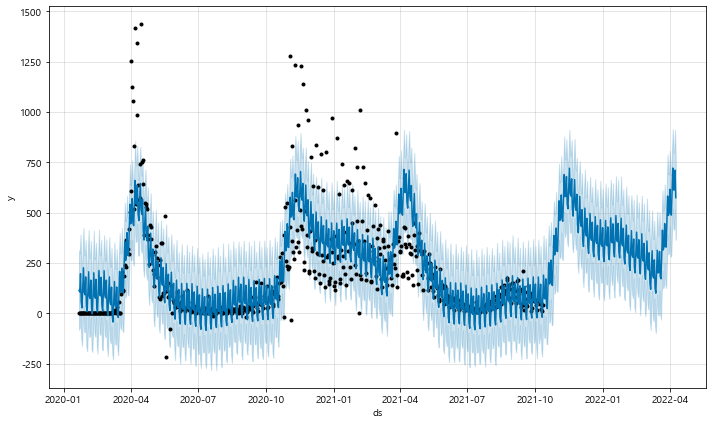

In [173]:
m.plot(forecast)

```
사망자 역시 급격히 늘어나는 추세를 보이진 않고 지금까지 겪어왔던 패턴과 비슷한 패턴을 반복할 수 있다는
가능성을 암시하는 결과가 나왔다.
```

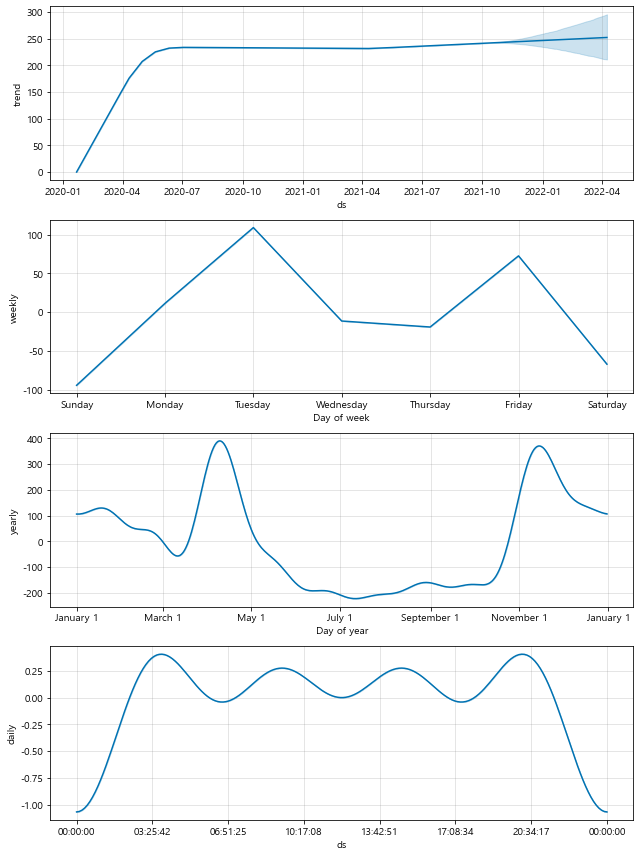

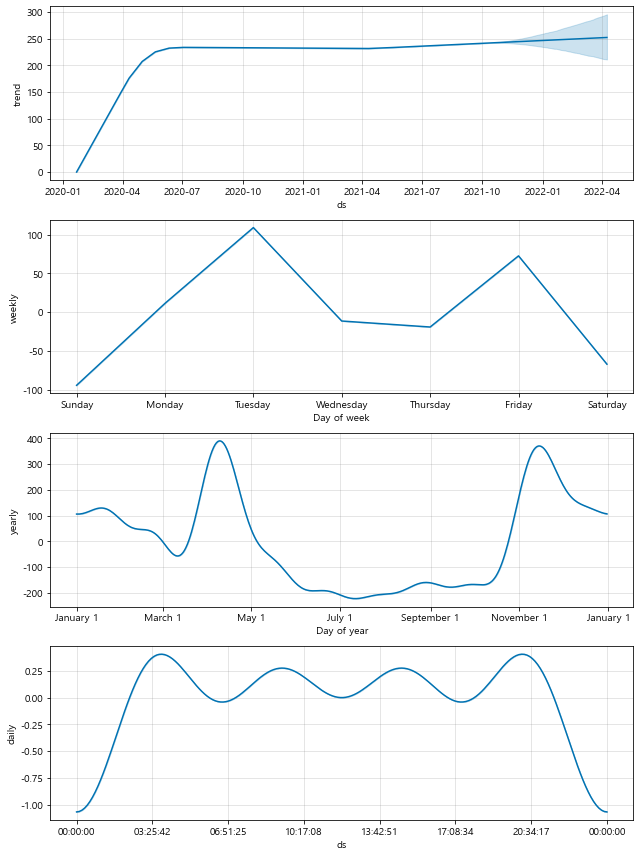

In [174]:
m.plot_components(forecast)

```
지금까지는 점차 증가할것 같은 경향만 봐왓다면 프랑스는 반대로 지금 추세에서 더이상 증가하진 않을것이란 결과가 나온점 인상적이다.
또한 사망자 수가 많이 발생하는 월역시 다른 국가들과 차이가 보이는점이 인상적이다.
```

## 독일

### 확진자

In [175]:
df = pd.DataFrame({"ds": german_confirmed["ds"], "y": german_confirmed["y"]})
df.head()
m = Prophet(yearly_seasonality=True,  daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=180)
forecast = m.predict(future)

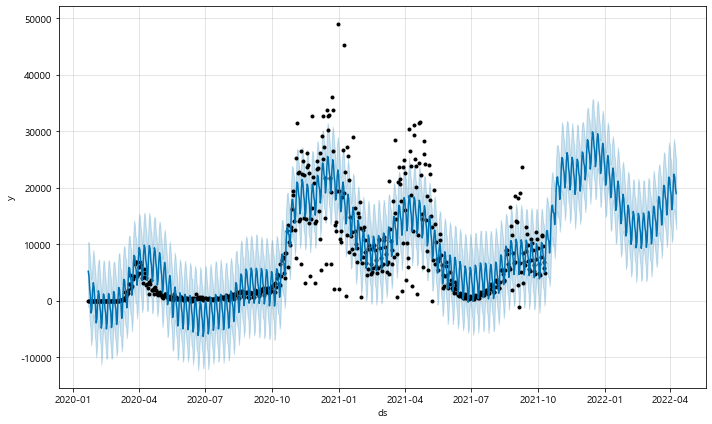

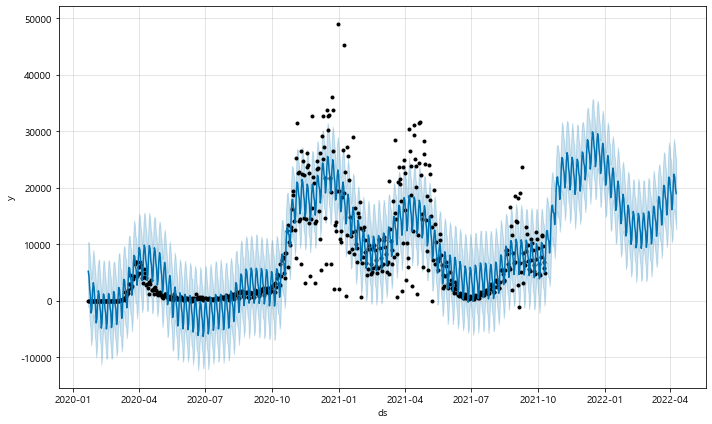

In [176]:
m.plot(forecast)

```
전체적으로 영국, 프랑스와 비슷한 양상을 띄고있다. 증가할수도 있을 가능성이 있지만 비슷한 패턴을 반복할 것 같은 변화를 보여준다.
```

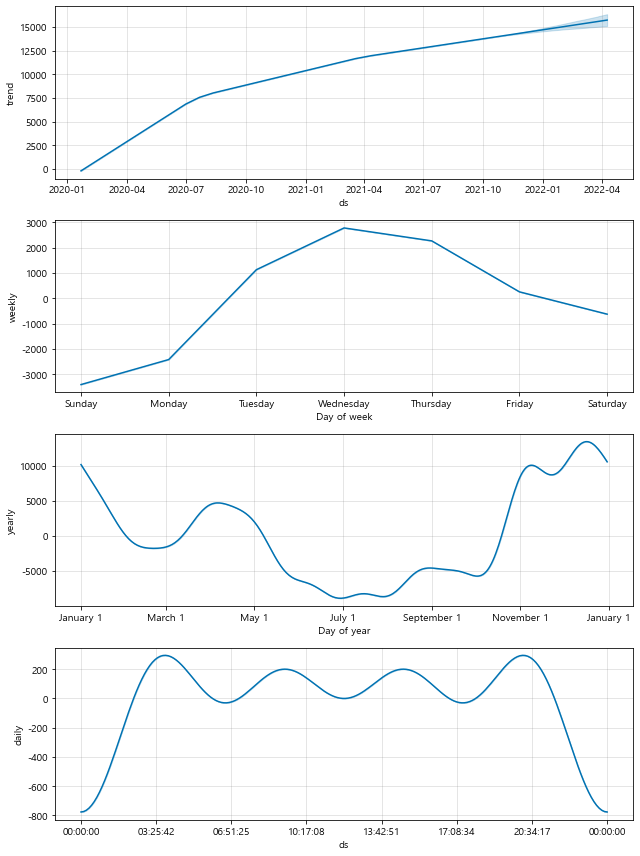

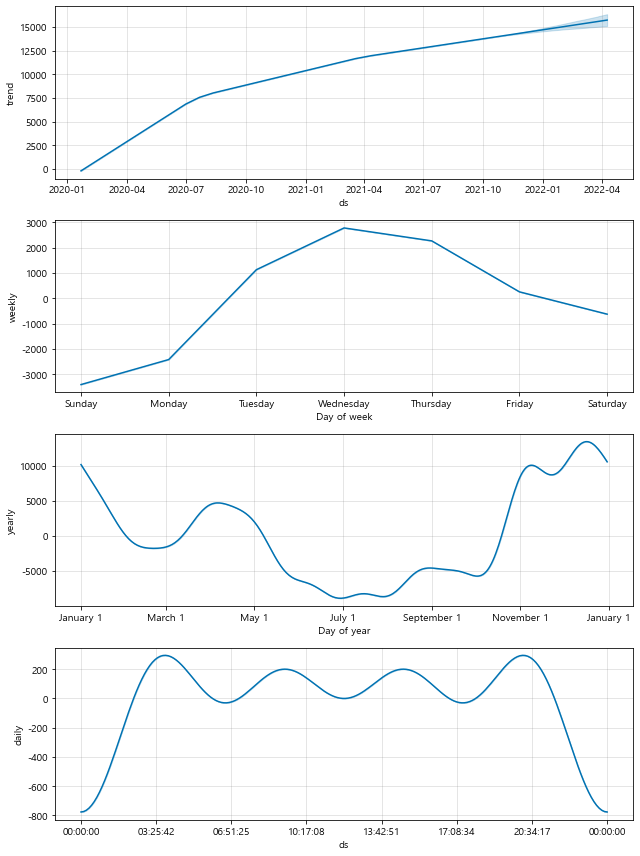

In [177]:
m.plot_components(forecast)

```
트렌드는 영국 데이터와 비슷하다. 서서히 증가하는 추세를 보이지만 그 변화율이 급격해지진 않는다.
```

### 사망자

In [178]:
df = pd.DataFrame({"ds": german_death["ds"], "y": german_death["y"]})
df.head()
m = Prophet(yearly_seasonality=True,  daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=180)
forecast = m.predict(future)

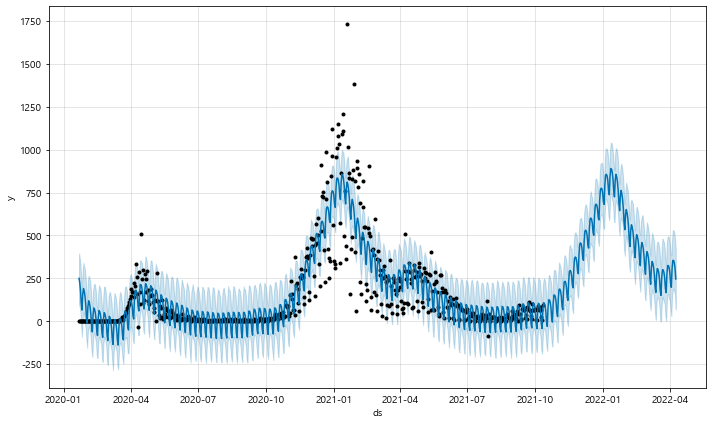

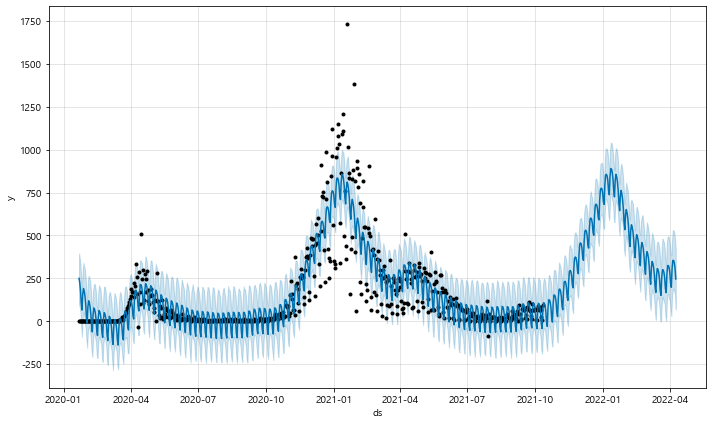

In [179]:
m.plot(forecast)

```
사망자 추세는 프랑스와 비슷하게 나왔다. 증가하는 양상을 보이기보단 일정 주기로 늘엇다 줄엇다를 반복할 것으로 보인다.
```

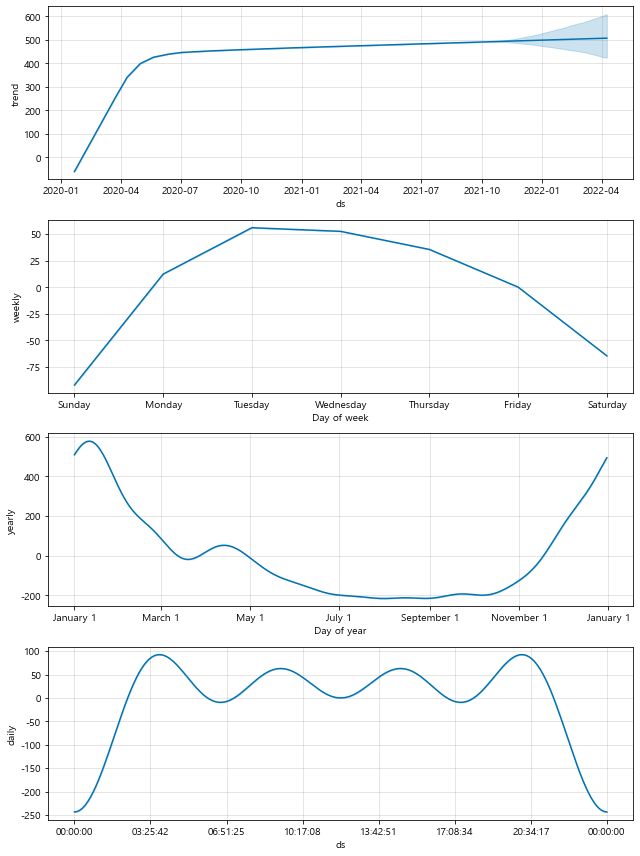

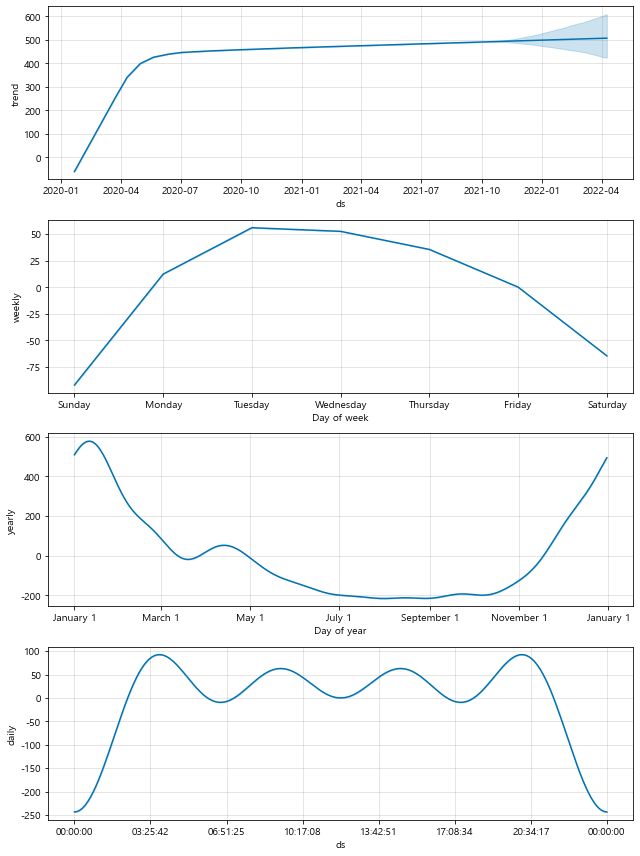

In [180]:
m.plot_components(forecast)

```
트렌드 역시 비슷하다고 볼 수 있겠다. 더이상 증가하는 추세가 아니라 일정한 트렌드를 유지할 것으로 보인다.
하지만 월별 트렌드로 봣을 경우 한국, 미국과 비슷하게 11월에서 1월경 급격히 높아지는 모습을 보이나 
완벽히 늘었다 줄었다를 반복하는 패턴을 나타내는 것으로 보인다.
```

---

## 문제 5번 결론

```
위의 트렌드 분석결과, 대체로 날씨가 추운 겨울철에 확진자 수 및 사망자 수가 증가하는 경향을 살펴 볼 수 있었다.
하지만 전체적으로 비교하면 유럽과 아시아,미국 이렇게 두 그룹으로 분류할 수 있을것 같다.
유럽 국가의 경우 대체로 증가 추세보단 일정 주기로 늘었다 줄었다를 반복하는 경향을 보이고, 한국과 미국의 경우 갑자기 급격히 증가하는 추세를 보여주고 있다.
```

---

# 문제 6

- 위의 까지 결과를 놓고 봣을땐 인구수 대비 확진자 수 비율과 사망자 수 비율이 다른 국가들에 비해 현격히 적은것을 확인할 수 있다.
하지만 확진판정을 받은후 사망한 경우를 제외하고 실제로 회복하는 비율까지 종합적으로 고려해 판단을 해야 할것 같다. 아까 위에서 한국의 회복 데이터는 갖고 온 상황이다.
다시 한번 아까 깃헙에서 time_series_covid19_recovered_global 파일에서 유럽 국가의 경우와 다시한번 비교해 보도록 하자
(미국의 경우 회복한 경우에 대한 데이터셋이 빠져 있어 분석을 진행하지 못했음)

In [181]:
korea_recover.head()

ds  y
0  2020-01-22 00:00:00  0
1  2020-01-23 00:00:00  0
2  2020-01-24 00:00:00  0
3  2020-01-25 00:00:00  0
4  2020-01-26 00:00:00  0

### 영국

In [182]:
uk_recover_raw = pd.read_csv(r"C:\Users\sanghui\Desktop\toyproject\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_recovered_global.csv")
uk_recover_raw = uk_recover_raw[uk_recover_raw["Country/Region"] == "United Kingdom"]
uk_recover_raw.head()



Province/State  Country/Region      Lat     Long  1/22/20  \
243                Anguilla  United Kingdom  18.2206 -63.0686        0   
244                 Bermuda  United Kingdom  32.3078 -64.7505        0   
245  British Virgin Islands  United Kingdom  18.4207 -64.6400        0   
246          Cayman Islands  United Kingdom  19.3133 -81.2546        0   
247         Channel Islands  United Kingdom  49.3723  -2.3644        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/2/21  10/3/21  \
243        0        0        0        0        0  ...        0        0   
244        0        0        0        0        0  ...        0        0   
245        0        0        0        0        0  ...        0        0   
246        0        0        0        0        0  ...        0        0   
247        0        0        0        0        0  ...        0        0   

     10/4/21  10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
243        0        0        0        0        0        0         0         0  
244        0        0        0        0        0        0         0         0  
245        0        0        0        0        0        0         0         0  
246        0        0        0        0        0        0         0         0  
247        0        0        0        0        0        0         0         0  

[5 rows x 633 columns]

In [183]:
uk_recover_raw = uk_recover_raw.groupby(["Country/Region"]).sum()
uk_recover_raw

Lat        Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                               
United Kingdom  262.083198 -497.280566        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  10/2/21  10/3/21  \
Country/Region                                      ...                     
United Kingdom        0        0        0        0  ...        0        0   

                10/4/21  10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  \
Country/Region                                                         
United Kingdom        0        0        0        0        0        0   

                10/10/21  10/11/21  
Country/Region                      
United Kingdom         0         0  

[1 rows x 631 columns]

In [184]:
uk_recover_raw.reset_index(inplace=True)

In [185]:
uk_recover_raw

Country/Region         Lat        Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0  United Kingdom  262.083198 -497.280566        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  10/2/21  10/3/21  10/4/21  10/5/21  \
0        0        0        0  ...        0        0        0        0   

   10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
0        0        0        0        0         0         0  

[1 rows x 632 columns]

In [186]:
del uk_recover_raw["Country/Region"]
del uk_recover_raw["Lat"]
del uk_recover_raw["Long"]

In [187]:
uk_recover_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 629 entries, 1/22/20 to 10/11/21
dtypes: int64(629)
memory usage: 5.0 KB


In [188]:
uk_recover = pd.DataFrame({"ds": dates, "y": uk_recover_raw.values[0]})
uk_recover.head()

ds  y
0 2020-01-22  0
1 2020-01-23  0
2 2020-01-24  0
3 2020-01-25  0
4 2020-01-26  0

In [189]:
tmp = uk_recover.copy()

for i in range(1,629):
    # 각 행의 차를 구한후 원본 프레임에 데이터 재할당
    uk_recover["y"][i] = tmp["y"][i] - tmp["y"][i-1]

C:\Users\sanghui\AppData\Local\Temp/ipykernel_8796/1866977057.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_recover["y"][i] = tmp["y"][i] - tmp["y"][i-1]


In [190]:
uk_recover.loc[uk_recover["y"] < 0] = 0

In [191]:
uk_recover["ds"] = dates

In [192]:
uk_recover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      629 non-null    datetime64[ns]
 1   y       629 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.0 KB


In [193]:
uk_recover.tail()

ds  y
624 2021-10-07  0
625 2021-10-08  0
626 2021-10-09  0
627 2021-10-10  0
628 2021-10-11  0

### 프랑스

In [194]:
france_recover_raw = pd.read_csv(r"C:\Users\sanghui\Desktop\toyproject\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_recovered_global.csv")
france_recover_raw = france_recover_raw[france_recover_raw["Country/Region"] == "France"]
france_recover_raw.head()

Province/State Country/Region      Lat        Long  1/22/20  1/23/20  \
104     French Guiana         France   3.9339  -53.125800        0        0   
105  French Polynesia         France -17.6797  149.406800        0        0   
106        Guadeloupe         France  16.2650  -61.551000        0        0   
107        Martinique         France  14.6415  -61.024200        0        0   
108           Mayotte         France -12.8275   45.166244        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  10/2/21  10/3/21  10/4/21  \
104        0        0        0        0  ...        0        0        0   
105        0        0        0        0  ...        0        0        0   
106        0        0        0        0  ...        0        0        0   
107        0        0        0        0  ...        0        0        0   
108        0        0        0        0  ...        0        0        0   

     10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
104        0        0        0        0        0         0         0  
105        0        0        0        0        0         0         0  
106        0        0        0        0        0         0         0  
107        0        0        0        0        0         0         0  
108        0        0        0        0        0         0         0  

[5 rows x 633 columns]

In [195]:
france_recover_raw = france_recover_raw.groupby(["Country/Region"]).sum()
france_recover_raw

Lat        Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                              
France          77.103595 -118.075614        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  10/2/21  10/3/21  \
Country/Region                                      ...                     
France                0        0        0        0  ...        0        0   

                10/4/21  10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  \
Country/Region                                                         
France                0        0        0        0        0        0   

                10/10/21  10/11/21  
Country/Region                      
France                 0         0  

[1 rows x 631 columns]

In [196]:
france_recover_raw.reset_index(inplace=True)
france_recover_raw

Country/Region        Lat        Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0         France  77.103595 -118.075614        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  10/2/21  10/3/21  10/4/21  10/5/21  \
0        0        0        0  ...        0        0        0        0   

   10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
0        0        0        0        0         0         0  

[1 rows x 632 columns]

In [197]:
del france_recover_raw["Country/Region"]
del france_recover_raw["Lat"]
del france_recover_raw["Long"]

In [198]:
france_confirmed_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 629 entries, 1/22/20 to 10/11/21
dtypes: int64(629)
memory usage: 5.0 KB


In [199]:
france_recover = pd.DataFrame({"ds": dates, "y": france_recover_raw.values[0]})
france_recover.head()

ds  y
0 2020-01-22  0
1 2020-01-23  0
2 2020-01-24  0
3 2020-01-25  0
4 2020-01-26  0

In [200]:
tmp = france_recover.copy()

for i in range(1,629):
    # 각 행의 차를 구한후 원본 프레임에 데이터 재할당
    france_recover["y"][i] = tmp["y"][i] - tmp["y"][i-1]

C:\Users\sanghui\AppData\Local\Temp/ipykernel_8796/3362929166.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_recover["y"][i] = tmp["y"][i] - tmp["y"][i-1]


In [201]:
france_recover.loc[france_recover["y"] < 0] = 0

In [202]:
france_recover["ds"] = dates

In [203]:
france_recover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      629 non-null    datetime64[ns]
 1   y       629 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.0 KB


In [204]:
france_recover.tail()

ds  y
624 2021-10-07  0
625 2021-10-08  0
626 2021-10-09  0
627 2021-10-10  0
628 2021-10-11  0

### 독일

In [205]:
german_recover_raw = pd.read_csv(r"C:\Users\sanghui\Desktop\toyproject\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_recovered_global.csv")
german_recover_raw = german_recover_raw[german_recover_raw["Country/Region"] == "Germany"]
german_recover_raw.head()

Province/State Country/Region        Lat       Long  1/22/20  1/23/20  \
119            NaN        Germany  51.165691  10.451526        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  10/2/21  10/3/21  10/4/21  \
119        0        0        0        0  ...        0        0        0   

     10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
119        0        0        0        0        0         0         0  

[1 rows x 633 columns]

In [206]:
del german_recover_raw["Province/State"]
del german_recover_raw["Country/Region"]
del german_recover_raw["Lat"]
del german_recover_raw["Long"]

In [207]:
german_recover_raw

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
119        0        0        0        0        0        0        0        0   

     1/30/20  1/31/20  ...  10/2/21  10/3/21  10/4/21  10/5/21  10/6/21  \
119        0        0  ...        0        0        0        0        0   

     10/7/21  10/8/21  10/9/21  10/10/21  10/11/21  
119        0        0        0         0         0  

[1 rows x 629 columns]

In [208]:
german_recover = pd.DataFrame({"ds": dates, "y": german_recover_raw.values[0]})
german_recover.head()

ds  y
0 2020-01-22  0
1 2020-01-23  0
2 2020-01-24  0
3 2020-01-25  0
4 2020-01-26  0

In [209]:
tmp = german_recover.copy()

for i in range(1,629):
    # 각 행의 차를 구한후 원본 프레임에 데이터 재할당
    german_recover["y"][i] = tmp["y"][i] - tmp["y"][i-1]

C:\Users\sanghui\AppData\Local\Temp/ipykernel_8796/2070172316.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  german_recover["y"][i] = tmp["y"][i] - tmp["y"][i-1]


In [210]:
german_recover.loc[german_recover["y"] < 0] = 0
german_recover["ds"] = dates

In [211]:
german_recover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      629 non-null    datetime64[ns]
 1   y       629 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.0 KB


In [212]:
german_recover.tail()

ds  y
624 2021-10-07  0
625 2021-10-08  0
626 2021-10-09  0
627 2021-10-10  0
628 2021-10-11  0

## 회복수 / 확진수로 나라별 새로운 데이터 프레임 만들기

In [220]:
# y = 0값 삭제
# confirmed y 값이 0인경우 계산의 편의성을 위해 1로 주고 연산을 시작하겠음
tmp_kor = korea_confirmed.copy()
tmp_kor.loc[tmp_kor["y"] == 0] = 1
comp_kor = pd.DataFrame({"ds":dates, "y": korea_recover["y"] / tmp_kor["y"]})

In [224]:
# 나머지 나라도 마찬가지로 진행

tmp_uk = uk_confirmed.copy()
tmp_uk.loc[tmp_uk["y"] == 0] = 1
comp_uk = pd.DataFrame({"ds":dates, "y": uk_recover["y"] / tmp_uk["y"]})

tmp_france = france_confirmed.copy()
tmp_france.loc[tmp_france["y"] == 0] = 1
comp_france = pd.DataFrame({"ds":dates, "y": france_recover["y"] / tmp_france["y"]})

tmp_german = german_confirmed.copy()
tmp_german.loc[tmp_german["y"] == 0] = 1
comp_german = pd.DataFrame({"ds":dates, "y": german_recover["y"] / tmp_german["y"]})

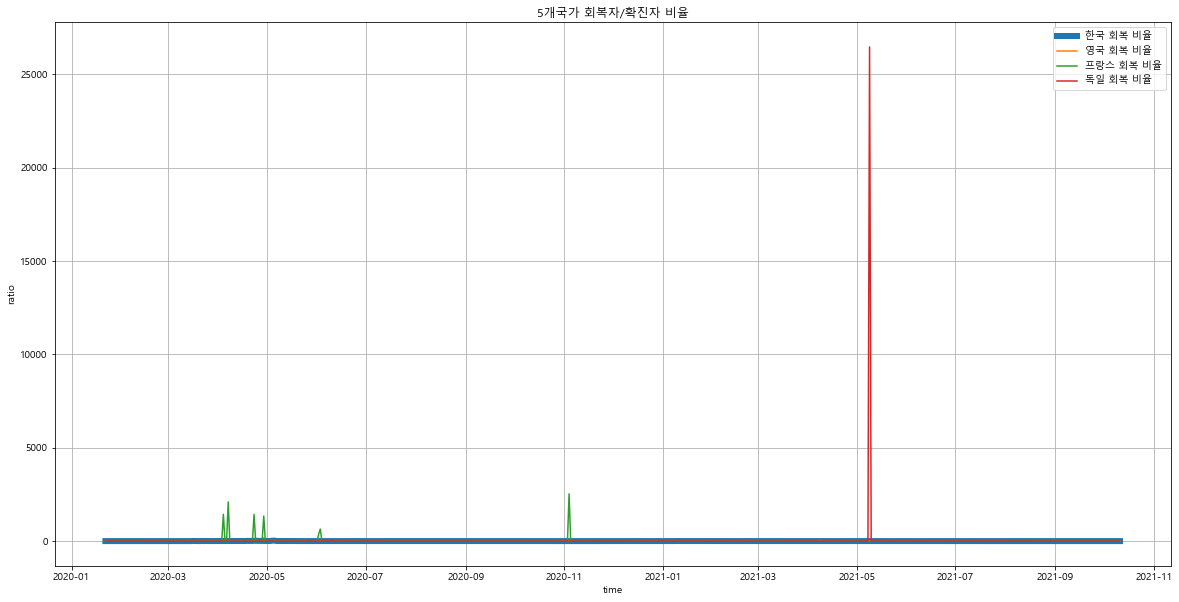

In [225]:
plt.figure(figsize=(20,10))
plt.plot(comp_kor["ds"], comp_kor["y"], label="한국 회복 비율", lw="6")
plt.plot(comp_uk["ds"], comp_uk["y"], label="영국 회복 비율")
plt.plot(comp_france["ds"], comp_france["y"], label="프랑스 회복 비율")
plt.plot(comp_german["ds"], comp_german["y"], label="독일 회복 비율")
plt.grid(True)
plt.legend()
plt.title('5개국가 회복자/확진자 비율')
plt.xlabel("time")
plt.ylabel("ratio")
plt.show()

```
각국의 회복률을 비교해 보면 유의미한 데이터가 나오는것 같진 않다. 저기서 유독 높은 수치를 보이는 독일의 케이스와 한국을 비교해보도록한다.
```

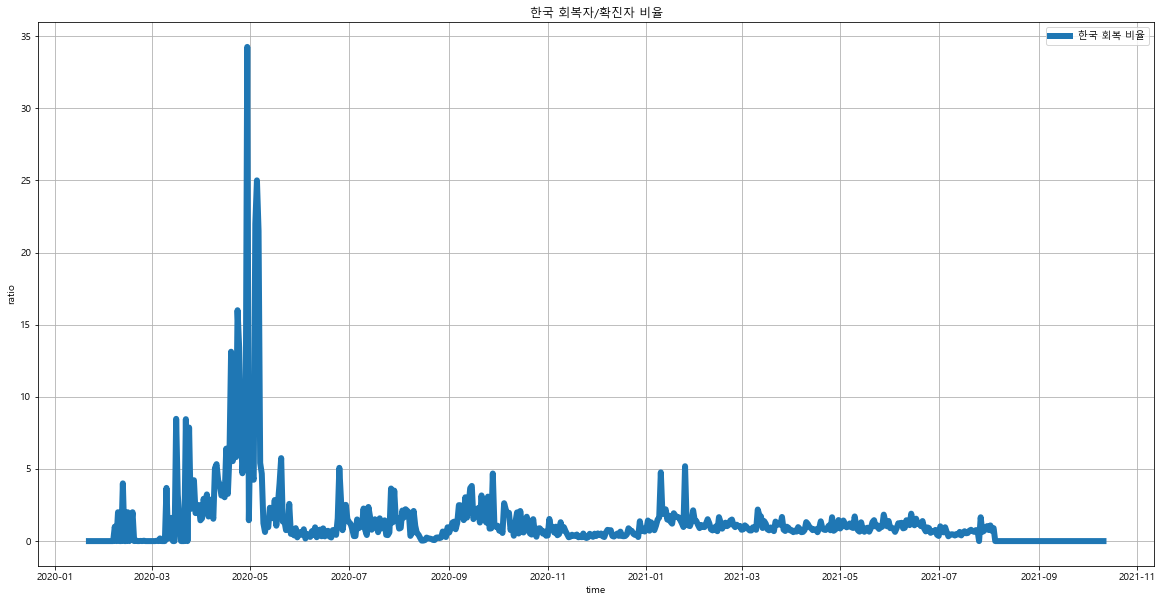

In [226]:
plt.figure(figsize=(20,10))
plt.plot(comp_kor["ds"], comp_kor["y"], label="한국 회복 비율", lw="6")
plt.grid(True)
plt.legend()
plt.title('한국 회복자/확진자 비율')
plt.xlabel("time")
plt.ylabel("ratio")
plt.show()

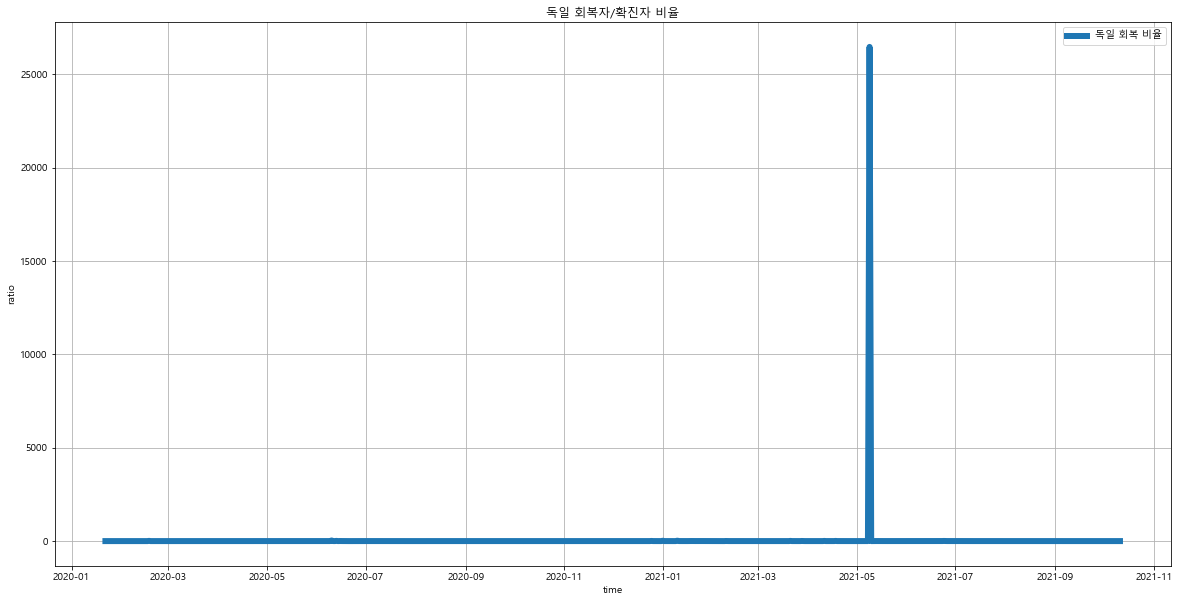

In [227]:
plt.figure(figsize=(20,10))
plt.plot(comp_german["ds"], comp_german["y"], label="독일 회복 비율", lw="6")
plt.grid(True)
plt.legend()
plt.title('독일 회복자/확진자 비율')
plt.xlabel("time")
plt.ylabel("ratio")
plt.show()

```
위의 데이터로 봣을때 백신의 보급 상황, 여러 의료 여건 등의 이유로 한국과 달리 다른 국가들의 회복율에 차이가 있음이 나타난다.
그래도 한국은 다른 국가와 비교했을떄 확진후 회복판정을 받는 비율도 어느정도 있는것으로 확인이된다.
```

## 6번 결론

```
지금 까지의 내용을 종합해 봤을때, 한국은 총인구수 대비 다른 국가들에 비해 확진자 수와 사망자 수가 현격히 적은것으로 나타난다.
또한 회복률도 다른국가와 달리 어느정도 따라오는것으로 보인다. 물론, 한국은 다른나라에 비해 의료보험등 국가적으로 진료를 지원해주는 제도가 많은 변수 등 여러가지 변수가 있겠지만
증가 추세를 제외하면 나머지 국가에 비해 코로나가 어느정도 잘 통제되고 있는것으로 보인다.
```

---

# 문제 7번

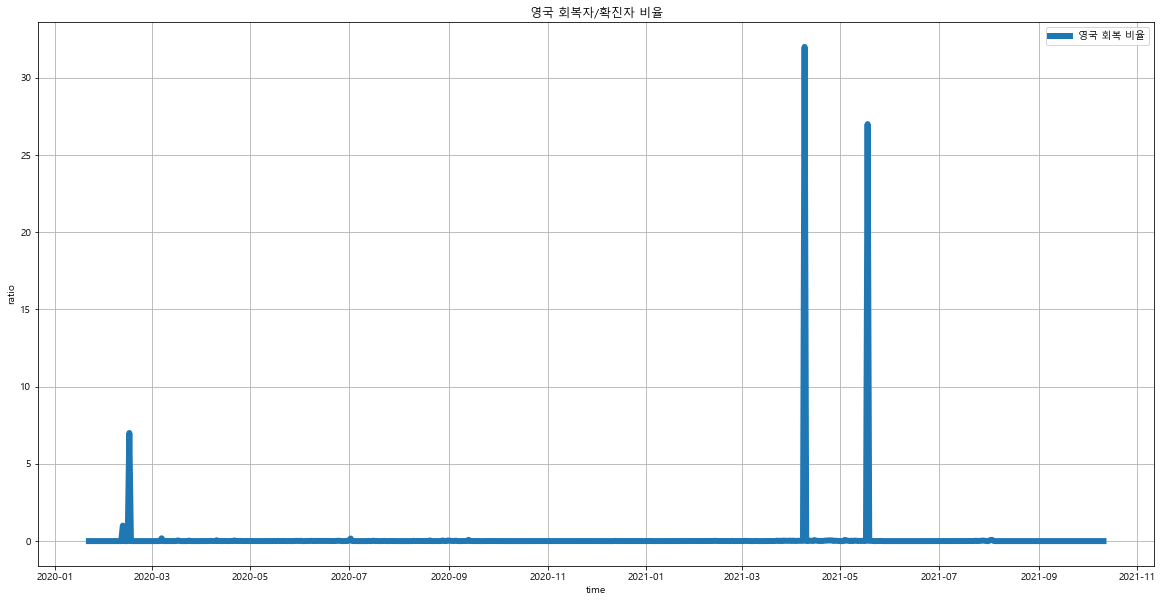

In [228]:
plt.figure(figsize=(20,10))
plt.plot(comp_uk["ds"], comp_uk["y"], label="영국 회복 비율", lw="6")
plt.grid(True)
plt.legend()
plt.title('영국 회복자/확진자 비율')
plt.xlabel("time")
plt.ylabel("ratio")
plt.show()

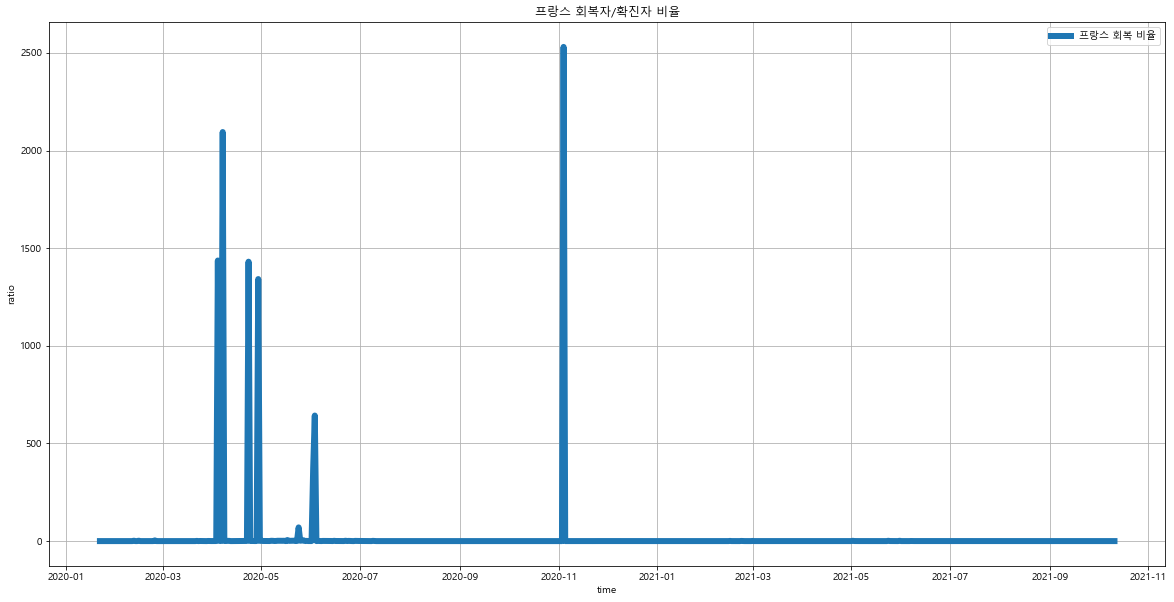

In [229]:
plt.figure(figsize=(20,10))
plt.plot(comp_france["ds"], comp_france["y"], label="프랑스 회복 비율", lw="6")
plt.grid(True)
plt.legend()
plt.title('프랑스 회복자/확진자 비율')
plt.xlabel("time")
plt.ylabel("ratio")
plt.show()

```
한 나라의 의료 수준을 가늠할 데이터는 기준을 어떻게 정하냐에 따라 상이할 것 같다.
의료 수준이 좋다 하더라도 여러 제도가 뒷받침 되지 않는다면 사망률과 생존률이라는 수치가 의미 없을 수 있다고 생각하기 때문이다.
만약 이번 코로나 사태에서 해당 국가 국민이 코로나 확진 판정을 받고 회복 할 수 있는것을 의료 수준의 척도로 잡는다면
위의 recover 데이터가 몇몇 시사점을 던져 줄 수 있다고 생각한다.
한국은 다른 나라와 달리 그래도 어느정도 회복 판정을 받은 데이터가 집계되고 있다. 하지만 유럽국가의 경우 전체 총 인구수 대비를 고려한다 하더라도
이번 코로나 확진자와 사망자수가 한국보다 월등히 높음에도 불구하고 확진 데이터의 집계가 들쑥날쑥해 보인다. 
위에서 살펴봣듯이 미국의 경우도 예외가 아니다. 
실제로 여러 집계데이터를 봣을때 한국에 일일 확진자 사망자수는 최근을 제외하고 거의 백단위를 넘어가지 않는다.
실제 위의 문제 1번 상황부터 여러 집계 데이터를 통해 한국은 다른 나라에 비해 확진자수나 이로인한 사망수가 현저히 낮고 어느정도 회복을 하는 모습으로 다른나라와 차이점이 확연히 보인다고 생각한다.
각 나라의 트렌드 차이와 양상은 비슷한점도 있고 차이점도 있지만 결과적인 수치만 놓고 봣을떄 한국은 다른 국가에 비해 이번 코로나 사태에 어느정도 잘 대응을 하고 있다고 생각한다.

```